In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score, RandomizedSearchCV ,train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, plot_roc_curve, plot_confusion_matrix
from sklearn.utils import shuffle

from mlxtend.plotting import plot_learning_curves

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

### Salary Dataset

In [2]:
# dek data yang digunakan

data_raw = pd.read_csv("salary.csv")
data_raw

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data = data_raw.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# Melihat deskripsi dari dataset

data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# cek missing values, dan hasil di bawah tidak ada missing values pada dataset yang digunakan

data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

<AxesSubplot:>

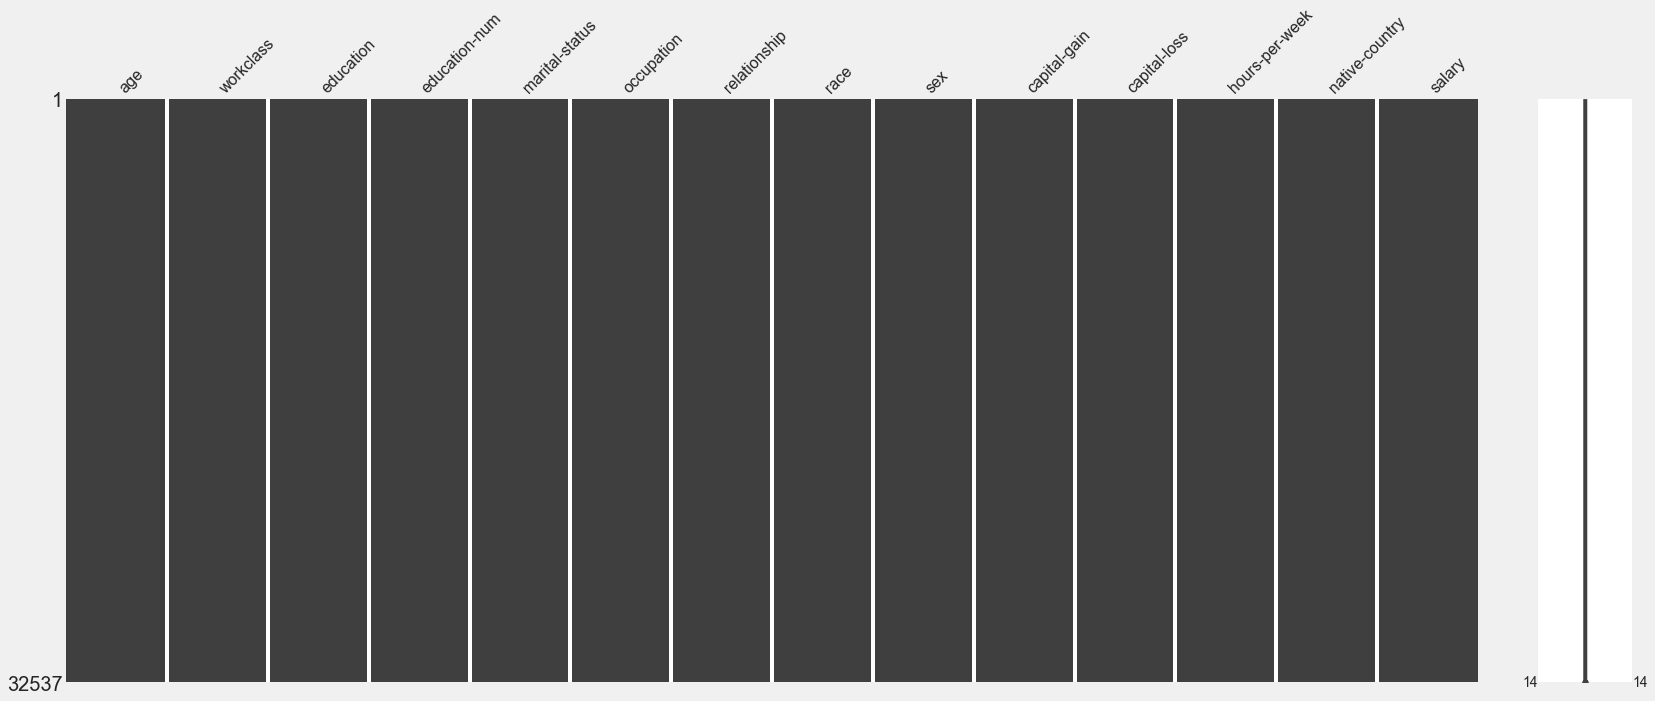

In [14]:
msno.matrix(data)

In [6]:
# cek data duplikat, dan ditemukan ada beberapa data duplikat

data.duplicated().sum()

24

In [7]:
data.loc[data.duplicated()] # cek data yang duplikat

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [8]:
# hapus data duplikat

data.drop_duplicates(inplace = True)
data.reset_index(inplace = True, drop = True)

In [9]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
# hapus kolom "fnlwgt" yang menurut saya tidak akan berguna

data.drop("fnlwgt", axis = "columns", inplace = True)

In [11]:
# cek data unik pada semua data kategorikal
# dengan tujuan jika ada data "aneh" atau juga missing input

for kolom in data.columns:
    if data[kolom].dtype != "O":
        pass
    else:
        data[kolom] = data[kolom].str.strip()
        print(f"Data Unik dari kolom {kolom} ada : \n{data[kolom].unique()}\n")
        
# dibawah ditemukan values yang tidak benar yaitu ada beberapa kolom punya value "?" dimana tidak benar

Data Unik dari kolom workclass ada : 
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Data Unik dari kolom education ada : 
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Data Unik dari kolom marital-status ada : 
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Data Unik dari kolom occupation ada : 
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

Data Unik dari kolom relationship ada : 
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

Data Unik dari kolom race ada : 
['White' 'Black' 'Asian-Pac-Islander' 'A

In [12]:
# kemudian untuk "membenarkan" data yang menurut saya salah, saya ganti nilai values
# tersebut menjadi value-nya jadi "Other"

for kolom in data.columns:
    if data[kolom].dtype == "O":
        data[kolom] = data[kolom].replace(to_replace= "?", value= "Other")

In [13]:
# cek kembali data

for kolom in data.columns:
    if data[kolom].dtype == "O":
        print(f"Data Unik dari kolom {kolom} ada : \n{data[kolom].unique()}\n")

Data Unik dari kolom workclass ada : 
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Other' 'Self-emp-inc' 'Without-pay' 'Never-worked']

Data Unik dari kolom education ada : 
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Data Unik dari kolom marital-status ada : 
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Data Unik dari kolom occupation ada : 
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Other'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

Data Unik dari kolom relationship ada : 
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

Data Unik dari kolom race ada : 
['White' 'Black' 'Asian-Pac-Isla

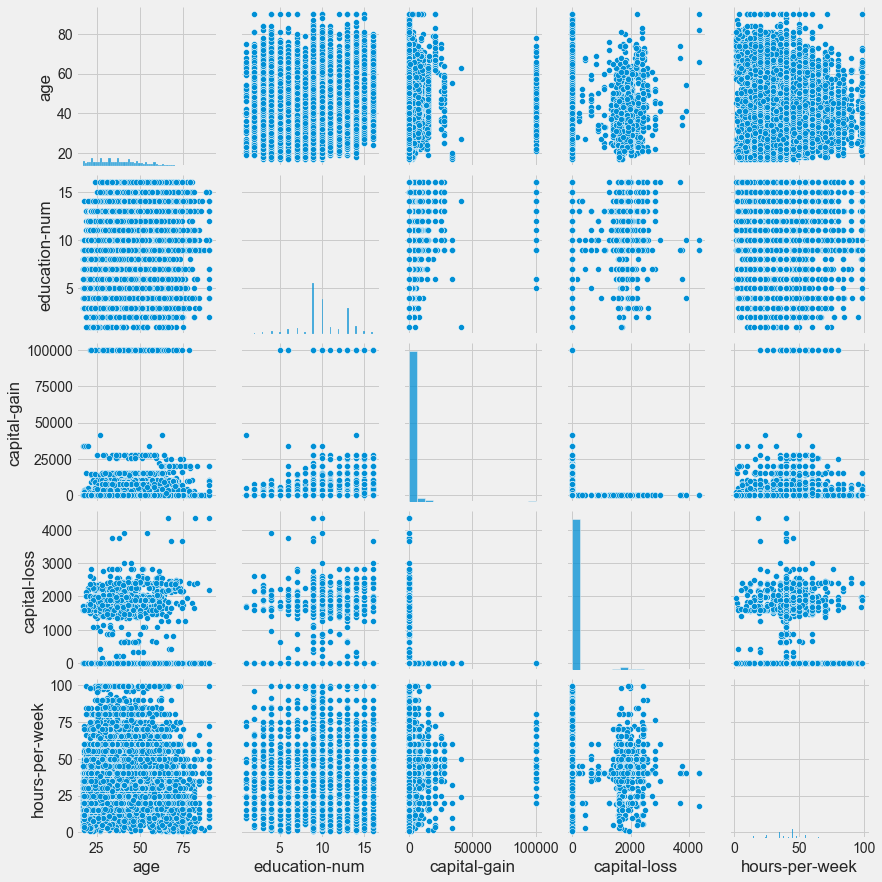

In [15]:
sns.pairplot(data)

In [16]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32533,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32534,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32535,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [17]:
data.describe()

# pada kolom "capital-gain" terlihat nilai maxnya "menurut saya terlalu besar" 
# maka saya anggap pada kolom tersebut ada data outliers

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,10.081815,1078.443741,87.368227,40.440329
std,13.637984,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [18]:
# mengatasi data outliers saya atasi dengan pada kolom "capital-gain" saya hanya mengambil data 
# yang mempunyai nilai lebih kecil dari nilai quantile 99%-nya

data = data.loc[data["capital-gain"] < data["capital-gain"].quantile(0.99)]

In [19]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,31929.000000,31929.000000,31929.000000,31929.000000,31929.000000
mean,38.411789,10.031038,360.266247,89.031915,40.298475
std,13.615257,2.549831,1569.491521,406.739787,12.295661
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,27.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,15020.000000,4356.000000,99.000000


In [20]:
kolom_num = []
kolom_str = []

for kolom in data.columns:
    if data[kolom].dtype == "O":
        kolom_str.append(kolom)
    else:
        kolom_num.append(kolom)

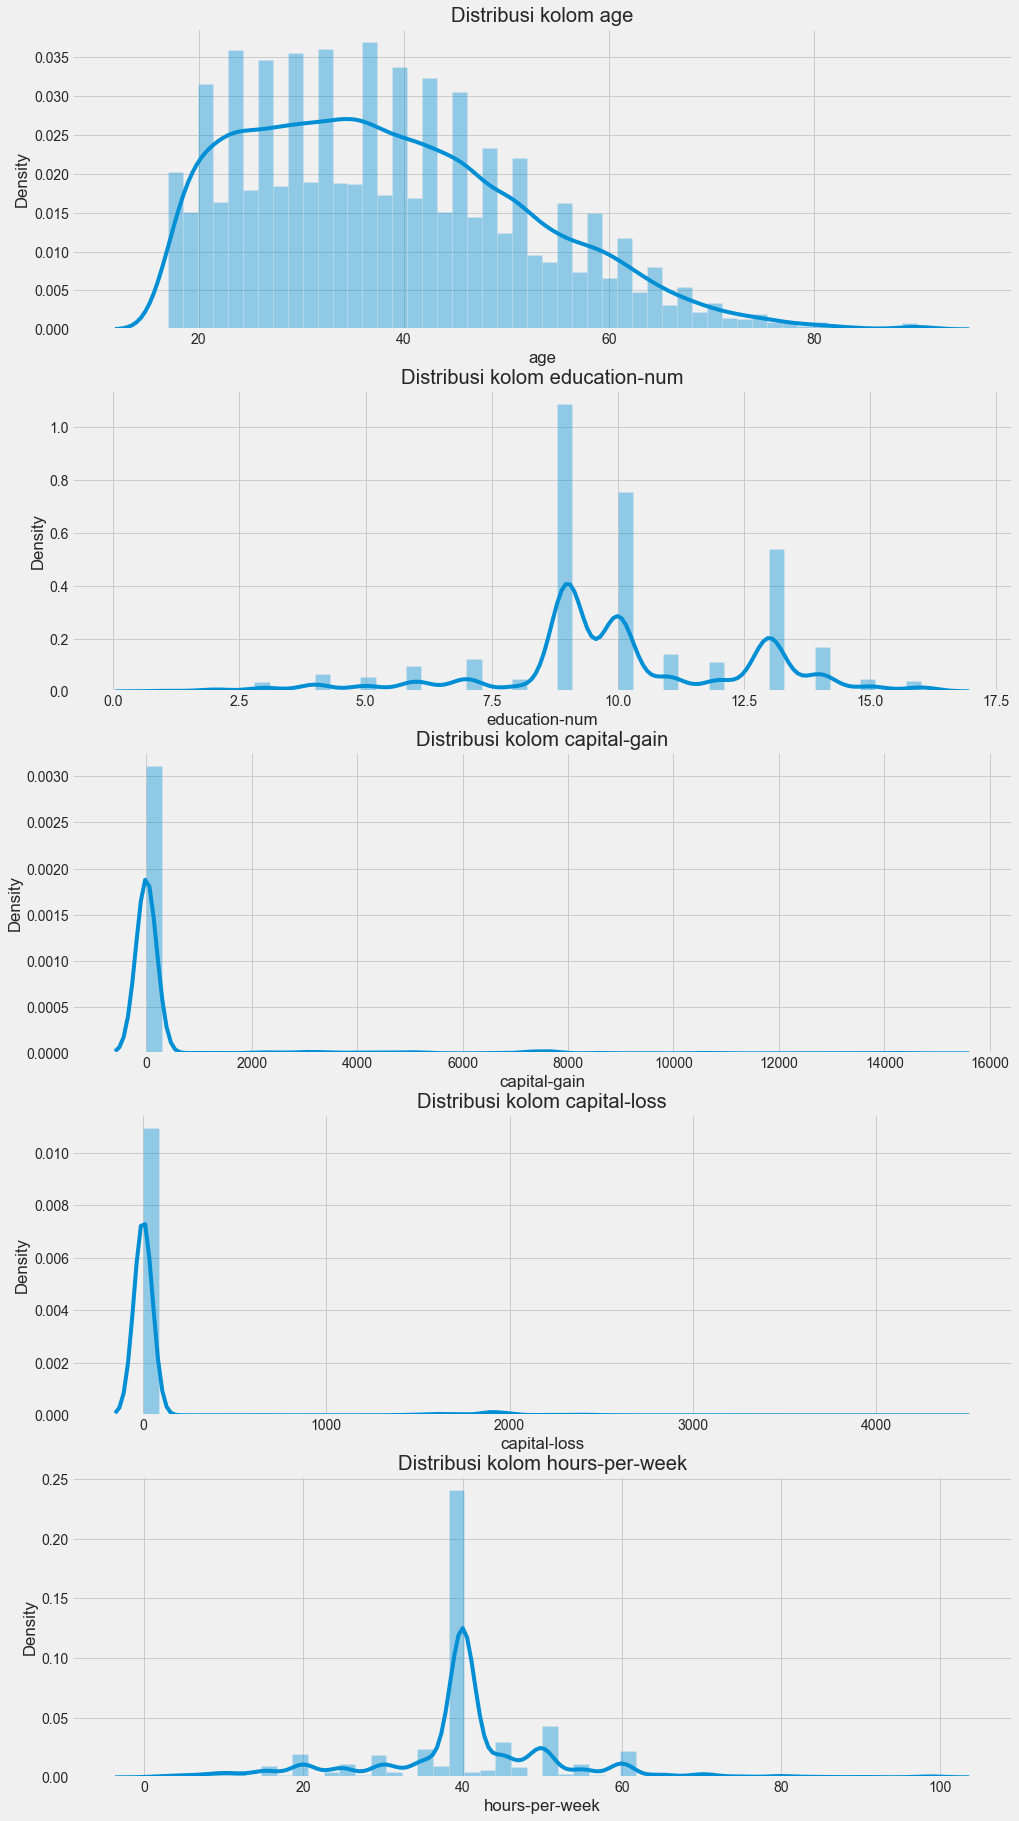

In [494]:
# Mencoba melihat distribusi dari kolom Numerikal

fig, axes = plt.subplots(nrows=5, ncols=1, figsize = (15,30))

for i, ax in enumerate(fig.axes):
    sns.distplot(data[kolom_num[i]], ax = ax)
    ax.set_title(f"Distribusi kolom {kolom_num[i]}")

In [517]:
# Melihat jumlah data pada Kolom Kategorikal
for kolom in kolom_str:
    print(f"Jumlah Data pada kolom {kolom} adalah \n{data[kolom].value_counts()}\n")

Jumlah Data pada kolom workclass adalah 
Private             22328
Self-emp-not-inc     2462
Local-gov            2067
Other                1820
State-gov            1278
Self-emp-inc         1005
Federal-gov           948
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

Jumlah Data pada kolom education adalah 
HS-grad         10421
Some-college     7217
Bachelors        5170
Masters          1625
Assoc-voc        1366
11th             1175
Assoc-acdm       1054
10th              929
7th-8th           645
9th               513
Prof-school       465
12th              430
Doctorate         372
5th-6th           332
1st-4th           166
Preschool          49
Name: education, dtype: int64

Jumlah Data pada kolom marital-status adalah 
Married-civ-spouse       14451
Never-married            10633
Divorced                  4408
Separated                 1019
Widowed                    981
Married-spouse-absent      414
Married-AF-spouse           23
Name: m

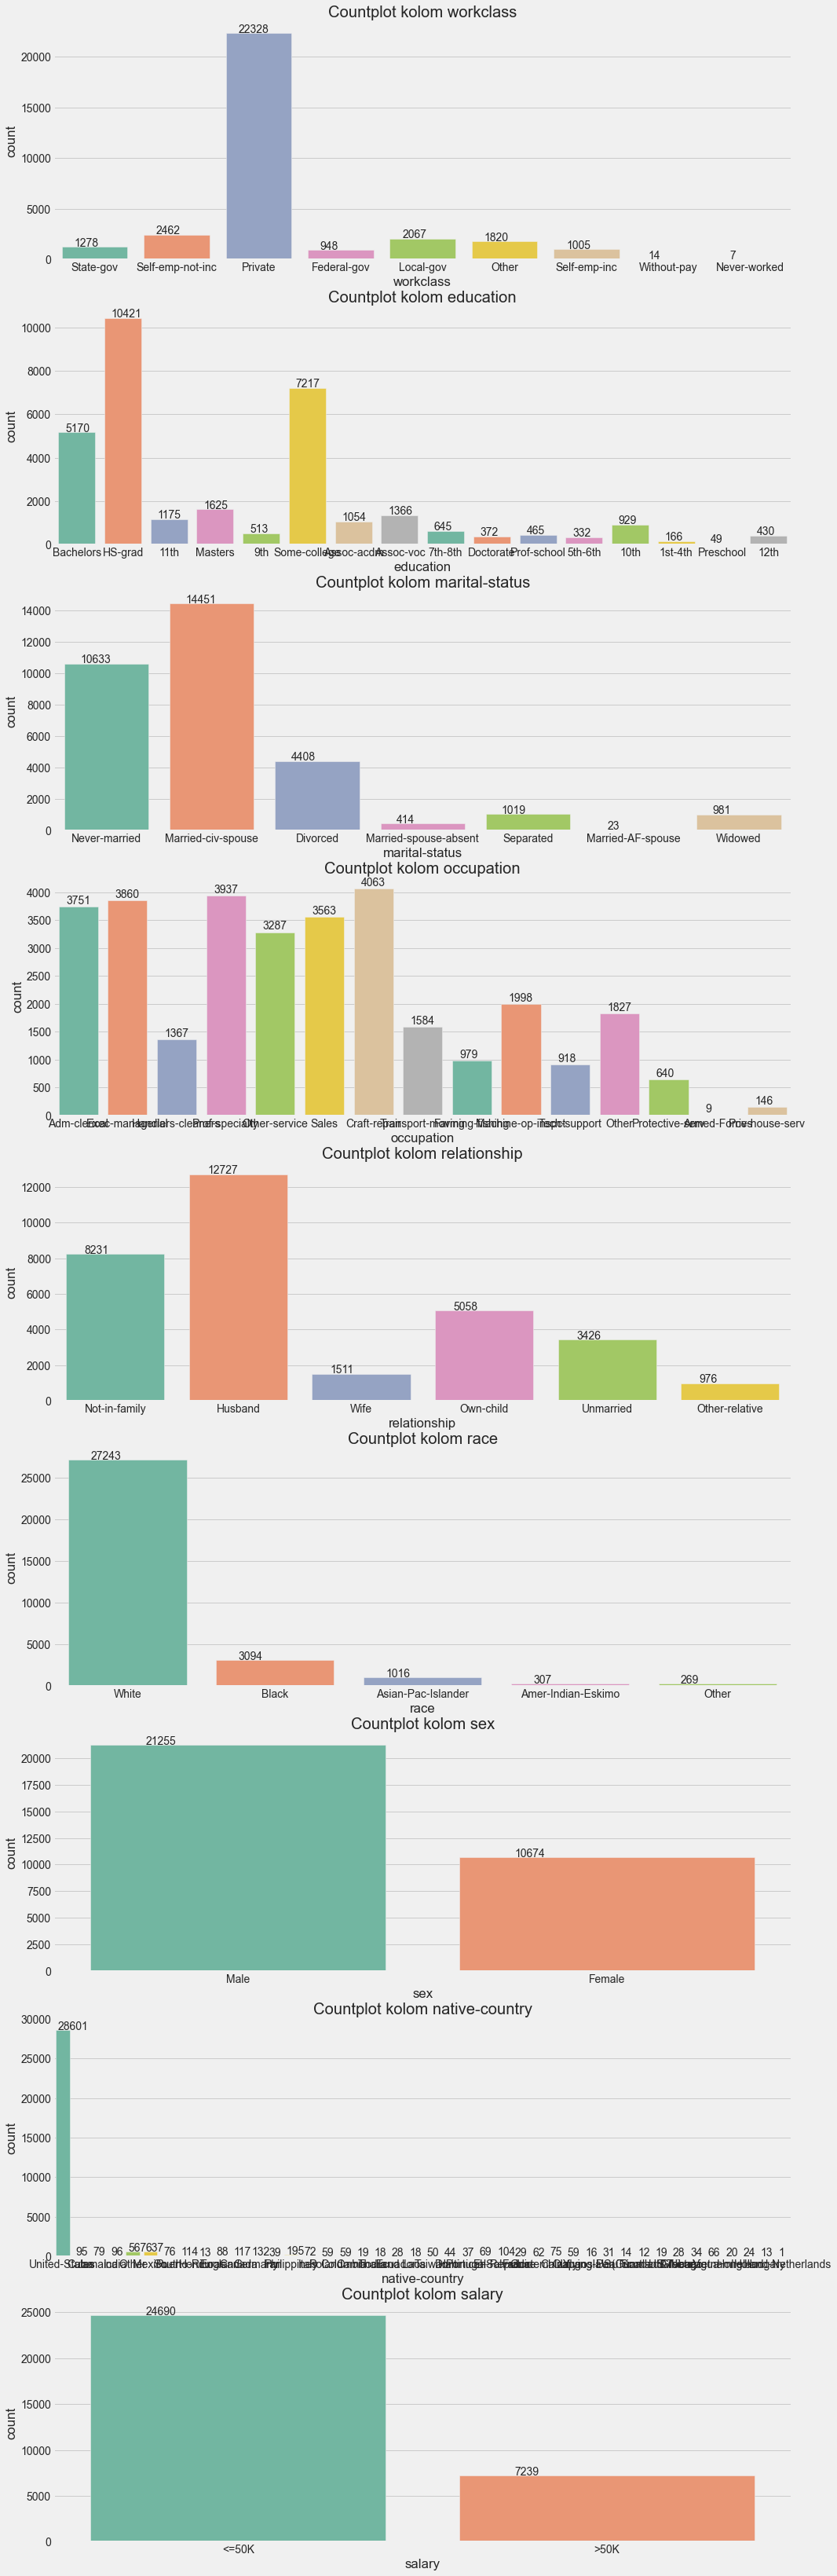

In [515]:
# Melihat jumlah persebaran dari kolom Kategorikal

fig, axes = plt.subplots(nrows=9
                         , ncols=1, figsize = (15,55))

for i, ax in enumerate(fig.axes):
    sns.countplot(data[kolom_str[i]], ax = ax, palette= "Set2")
    ax.set_title(f"Countplot kolom {kolom_str[i]}")
    for p in ax.patches:
        ax.annotate("{:.0f}".format((p.get_height())),
                    (p.get_x() + 0.15, p.get_height() + 50))
    #ax.set_xticklabels(rotation = 90, labels = data[kolom_str[i]].unique())

<AxesSubplot:>

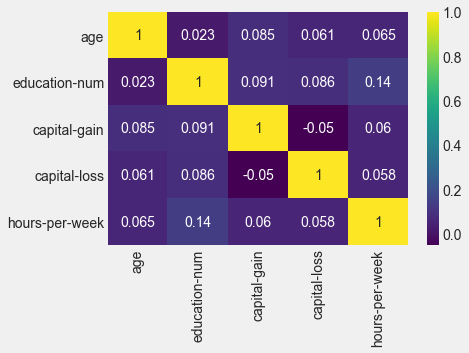

In [26]:
corr = data.corr()

sns.heatmap( corr , annot= True, cmap = "viridis")

In [28]:
# Dataset akhir yang akan digunakan untuk selanjutnya di buat menjadi Training dan Testing Dataset

data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32532,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32533,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32534,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [29]:
# pisahkan data input dan output

data_x = data.drop("salary", axis = "columns")
data_y = data.salary

In [30]:
data_y # cek data output

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32531    <=50K
32532    <=50K
32533     >50K
32534    <=50K
32535    <=50K
Name: salary, Length: 31929, dtype: object

In [31]:
# membagi dataset menjadi train dan test data, juga lakukan stratified pada dataset karena 
# dataset yang imbalance pada data output 

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, 
                                                   shuffle= True, stratify= data_y,
                                                   random_state= 42)

### Random Forest

Pada proses pembuatan model ini pada akhirnya akan menghasilkan total 4 buah model dengan rincian
- NormalRF = Model Random Forest Normal langsung menggunakan parameter bawaan dari sklearn
- NormalRF GS = Sebelum membuat model ini maka akan melakukan "Randomized Grid Search" pada model dasar RF untuk mencari "alternatif terbaik" dengan tujuan dapat meningkatkan kualitas model. Penggunaan Randomized Grid Search digunakan untuk tujuan mempersingkat waktu fitting dari beberapa kemungkinan yang ada
- ScalingRF = Sebuah eksperimen dimana akan menggunakan model Random dasar juga namun pada preprosesing akan menambahkan proses Standarisasi data pada kolom numerikal dan Menggunakan One Hot Encoding pada beberapa kolom yang di rasa perlu
- ScalingRF GS = Sama seperti versi Normal GS hanya dengan tambahan preprosesing seperti pada model ScalingRF

dari 4 model utama di atas, nantinya akan dilakukan training dengan total 8 kali sehingga hasil model yang sudah ditraining menjadi 8 model, perbedaan training ini adalah 
- Yang pertama akan menggunakan dataset utuh seperti sebelumnya yang berarti memiliki output/variabel dependent yang tidak imbang (imbalanced)
- Yang kedua akan menggunakan dataset yang sama seperti yang digunakan pada proses pertama, namun kali ini saya akan mencoba melakukan undersampling terhadap salah satu variabel dependent sehingga jumlahnya akan seimbang (balanced) antar 2 variabel output tersebut

#### Normal Random Forest

In [33]:
oe = OrdinalEncoder(handle_unknown = "use_encoded_value",
                    unknown_value= 50) # set Ordinal Encoder

# buat kolom transformer untuk preproses data dan kemudian tentukan kolom yang akan digunakan
# pada masing - masing metode preprosesing yang digunakan
ct = make_column_transformer(
                    (oe, ["education", "education-num", "native-country",
                          "occupation", "workclass", "relationship", "race", "sex",
                           "marital-status"]),
                    remainder= "passthrough", n_jobs= -1 )

rf_normal = RandomForestClassifier(random_state= 42, n_jobs= -1) # inisiasi algoritma random forest
pipe_rf_non_scaling = make_pipeline(ct, rf_normal, verbose= 0) # buat pipeline untuk 
                                                               # proses preproses dan fitting 
                                                               # data training ke algoritma yang digunakan

In [34]:
pipe_rf_non_scaling.fit(x_train, y_train) # Latih model yang dibuat tadi dengan data training

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=50),
                                                  ['education', 'education-num',
                                                   'native-country',
                                                   'occupation', 'workclass',
                                                   'relationship', 'race',
                                                   'sex',
                                                   'marital-status'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_jobs=-1, random_state=42))],
         verbose=0)

In [36]:
# inisiasi stratified kfold yang digunakan untuk cross validasi
# menggunakan stratified karena dataset yang imbalanced, sehingga ketika nanti dibagi saat 
# melakukan cross validasi, partisi datanya masih seimbang antara tiap output dan tidak malah
# jadi tambah imbalanced datanya

stratkfold = StratifiedKFold(random_state= 42,
                             shuffle= True)

In [37]:
# menghitung skor rata - rata dari cross validasi, pada cross validasi ini akan menghasilkan
# 5 output skor dan langsung dilakukan rata - rata

cvs_normal_rf = cross_val_score(pipe_rf_non_scaling, x_train, y_train, n_jobs=-1, cv = stratkfold,
                scoring= "accuracy").mean()

cvs_normal_rf

0.8461417373765613

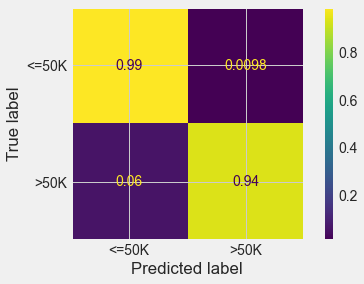

In [38]:
# membuat confusion matrix untuk dengan berdasarkan model yang dibuat tadi dengan
# menggunakan training data untuk data inputnya

plot_confusion_matrix(pipe_rf_non_scaling, x_train, y_train, normalize= "true")

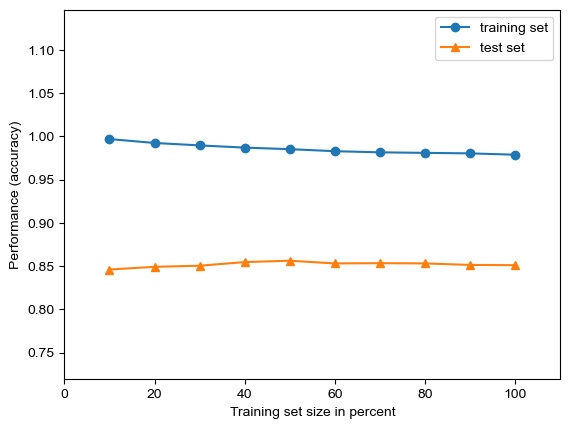

In [39]:
# mencari dan melihat learning curve dari model yang dibuat dan melihatnya
# dari berbagai macam datsaet yang digunakan, mulai dari 10 - 100% dataset

learning_curve_normalRF = plot_learning_curves(x_train, y_train, x_test, y_test, 
                                                pipe_rf_non_scaling,
                                                scoring= "accuracy",
                                                print_model= False)

In [40]:
# melihat report dari model yang digunakan terhadap data trainingnya

report_normal_rf = pd.DataFrame(classification_report(y_train, pipe_rf_non_scaling.predict(x_train),
                                output_dict= True))
report_normal_rf

,<=50K,>50K,accuracy,macro avg,weighted avg
precision,0.982469,0.965750,0.978781,0.974110,0.978679
recall,0.990229,0.939734,0.978781,0.964981,0.978781
f1-score,0.986334,0.952564,0.978781,0.969449,0.978678
support,19752.000000,5791.000000,0.978781,25543.000000,25543.000000


In [41]:
# Untuk mencoba mencari parameter yang lebih baik dapat di coba dengan menggunakan Grid Search
# parameter yang diubah dan digunakan ada di bawah

params = {}
params["randomforestclassifier__n_estimators"] = [50,100,200]
params["randomforestclassifier__max_depth"] = [None, 10, 20]
params["randomforestclassifier__criterion"] = ["gini", "entropy"]
params["randomforestclassifier__max_features"] = [None, "sqrt", "log2"]
params["randomforestclassifier__min_samples_split"] = [2, 4, 6]

params

{'randomforestclassifier__n_estimators': [50, 100, 200],
 'randomforestclassifier__max_depth': [None, 10, 20],
 'randomforestclassifier__criterion': ['gini', 'entropy'],
 'randomforestclassifier__max_features': [None, 'sqrt', 'log2'],
 'randomforestclassifier__min_samples_split': [2, 4, 6]}

In [42]:
# mencoba mencari parameter terbaik dengan melakukan training data dengan Randomized Grid Search
# Randomized ini berarti akan mencari 10 kombinasi parameter diatas secara acak untuk difittingkan
# pada model, dan saat fitting parameter dengan model juga dilakukan cross validasi pada model
# tersebut dengan menggunakan metode stratifiedkfold yang sebelumnya tadi


rf_gscv_normalRF = RandomizedSearchCV(pipe_rf_non_scaling, params, scoring= "accuracy",
                                      cv = stratkfold, random_state= 42, verbose= 1, n_jobs=-1,
                                      n_iter= 10)

In [43]:
rf_gscv_normalRF.fit(x_train, y_train) #fitting Randomized Grid Search pada Train data

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(n_jobs=-1,
                                                                remainder='passthrough',
                                                                transformers=[('ordinalencoder',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=50),
                                                                               ['education',
                                                                                'education-num',
                                                                                'native-country',
                                                                                'occupation',
                                                                                'workclass',
                                                                                '...
                                      verbose=0),
                   n_jobs=-1,
                   param_distributions={'randomforestclassifier__criterion': ['gini',
                                                                              'entropy'],
                                        'randomforestclassifier__max_depth': [None,
                                                                              10,
                                                                              20],
                                        'randomforestclassifier__max_features': [None,
                                                                                 'sqrt',
                                                                                 'log2'],
                                        'randomforestclassifier__min_samples_split': [2,
                                                                                      4,
                                                                                      6],
                                        'randomforestclassifier__n_estimators': [50,
                                                                                 100,
                                                                                 200]},
                   random_state=42, scoring='accuracy', verbose=1)

In [44]:
rf_gscv_normalRF.best_params_ # Melihat parameter yang paling baik setelah proses pencarian selesai

{'randomforestclassifier__n_estimators': 200,
 'randomforestclassifier__min_samples_split': 4,
 'randomforestclassifier__max_features': 'log2',
 'randomforestclassifier__max_depth': 20,
 'randomforestclassifier__criterion': 'entropy'}

In [45]:
rf_gscv_normalRF.best_score_ # hasil terbaik yang didapatkan dengan parameter di atas

0.8591392222762264

In [46]:
# Melakukan fitting kepada model RF baru lagi, namun dengan menggunakan parameter yang ditemukan
# oleh randomized grid search di atas
rf_normal2 = RandomForestClassifier(criterion= "entropy",
                                    n_estimators = 200,
                                    min_samples_split= 4,
                                    max_depth= 20,
                                    max_features= "log2",
                                    n_jobs= -1, random_state = 42)

pipe_rf_non_scaling2 = make_pipeline(ct, rf_normal2)

In [47]:
pipe_rf_non_scaling2.fit(x_train, y_train) # fitting model dengan train data

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=50),
                                                  ['education', 'education-num',
                                                   'native-country',
                                                   'occupation', 'workclass',
                                                   'relationship', 'race',
                                                   'sex',
                                                   'marital-status'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=20,
                                        max_features='log2',
                                        min_samples_split=4, n_estimators=200,
                                        n_jobs=-1, random_state=42))])

In [49]:
# Mencari kembali nilai cross validasi dari model baru dengan parameter baru

cvs_normal_rf2 = cross_val_score(pipe_rf_non_scaling2, x_train, y_train, scoring= "accuracy", 
                                 cv = stratkfold,
                                 n_jobs= -1).mean()

cvs_normal_rf2

0.8591392222762264

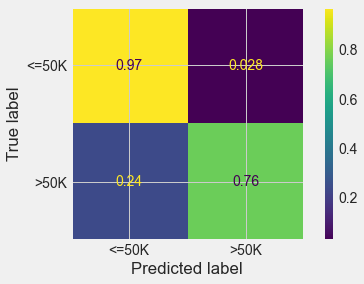

In [50]:
plot_confusion_matrix(pipe_rf_non_scaling2, x_train, y_train, normalize= "true") # cek confusion matrix

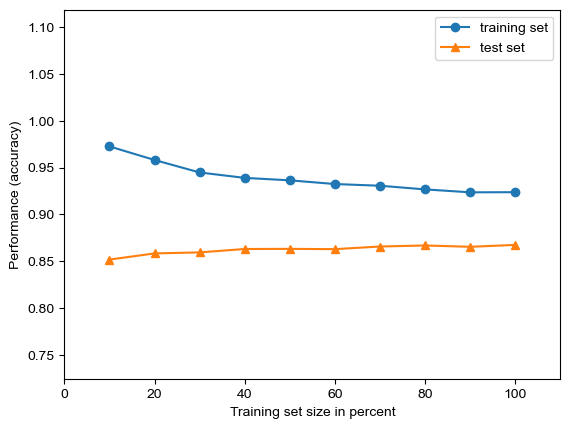

In [52]:
# melihat learning curve yang dihasilkan dari model yang baru

learning_curve_normalRF2 = plot_learning_curves(x_train, y_train, x_test, y_test,
                                                pipe_rf_non_scaling2, 
                                                scoring= "accuracy", print_model= False)

In [53]:
# melihat report dari model baru dengan menggunakan training data

report_normal_rf2 = pd.DataFrame(classification_report(y_train, pipe_rf_non_scaling2.predict(x_train), 
                                                       output_dict= True))
report_normal_rf2

,<=50K,>50K,accuracy,macro avg,weighted avg
precision,0.932223,0.888597,0.923776,0.910410,0.922332
recall,0.972104,0.758936,0.923776,0.865520,0.923776
f1-score,0.951746,0.818664,0.923776,0.885205,0.921574
support,19752.000000,5791.000000,0.923776,25543.000000,25543.000000


#### Random Forest dengan One Hot Encoding dan Standarisasi Numerikal Data

In [64]:
# Bagaimana jika sebuah model "tree-based" menggunakan preprosesing tambahan yaitu
# menggunakan one hot encoding untuk kolom kategorikal dan
# melakukan scaling untuk menstandarisasi data numerikal?

oe = OrdinalEncoder(handle_unknown = "use_encoded_value",
                    unknown_value= 50) # set Ordinal Encoder
ohe = OneHotEncoder(handle_unknown= "ignore") # set One Hot Encoder
scaler = StandardScaler() # set untuk Standard Scaler

# buat kolom transformer untuk preproses data dan sekalian tentukan kolom yang akan digunakan
ct = make_column_transformer(
                    (oe, ["education", "education-num", "native-country",
                          "occupation"]),
                    (ohe, ["workclass", "relationship", "race", "sex",
                           "marital-status"]),
                    (scaler, ["age", "capital-gain", "capital-loss",
                              "hours-per-week"]),
                    remainder= "passthrough", n_jobs= -1 )

In [65]:
rf = RandomForestClassifier(n_jobs= -1, random_state= 42) 
pipe_rf = make_pipeline(ct, rf, verbose= False) # buat pipeline untuk preproses dan fitting 
                                               # data training ke algoritma yang digunakan

In [66]:
# proses training dataset

pipe_rf.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=50),
                                                  ['education', 'education-num',
                                                   'native-country',
                                                   'occupation']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'relationship',
                                                   'race', 'sex',
                                                   'marital-status']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_jobs=-1, random_state=42))])

In [68]:
# mencari score cross validasi 

cvs_scaling_rf =  cross_val_score(pipe_rf, x_train, y_train, 
                                  n_jobs= - 1, cv = stratkfold, scoring= "accuracy").mean()
cvs_scaling_rf

0.8435188306047966

In [69]:
# laporan klasifikasi

report_scaling_rf =  pd.DataFrame(classification_report(y_train, 
                                                        pipe_rf.predict(x_train), output_dict= True))
report_scaling_rf

,<=50K,>50K,accuracy,macro avg,weighted avg
precision,0.982324,0.966246,0.978781,0.974285,0.978679
recall,0.990381,0.939216,0.978781,0.964798,0.978781
f1-score,0.986336,0.952539,0.978781,0.969438,0.978674
support,19752.000000,5791.000000,0.978781,25543.000000,25543.000000


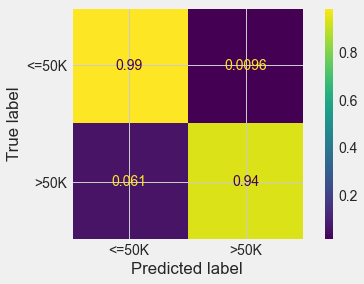

In [70]:
# confusion matrix

plot_confusion_matrix(pipe_rf, x_train, y_train, normalize= "true")

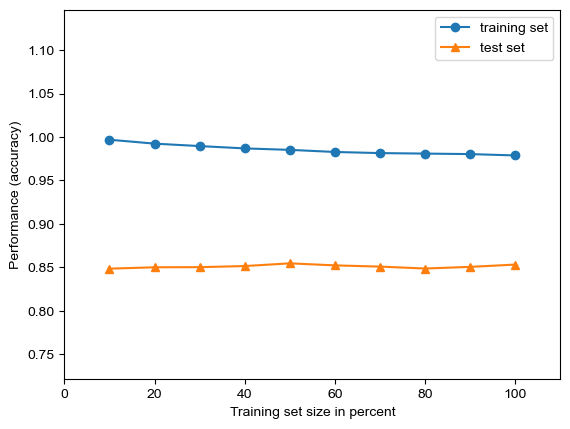

In [72]:
learning_curve_ScalingRF = plot_learning_curves(x_train, y_train, 
                                         x_test, y_test, pipe_rf, 
                                         scoring= "accuracy", 
                                         print_model= False)

In [73]:
# Untuk mencoba mencari parameter terbaik dapat di coba dengan menggunakan Grid Search
# parameter yang diubah dan digunakan ada di bawah

params = {}
params["randomforestclassifier__n_estimators"] = [50,100,200]
params["randomforestclassifier__max_depth"] = [None, 10, 20]
params["randomforestclassifier__criterion"] = ["gini", "entropy"]
params["randomforestclassifier__max_features"] = [None, "sqrt", "log2"]
params["randomforestclassifier__min_samples_split"] = [2, 4, 6]

params

{'randomforestclassifier__n_estimators': [50, 100, 200],
 'randomforestclassifier__max_depth': [None, 10, 20],
 'randomforestclassifier__criterion': ['gini', 'entropy'],
 'randomforestclassifier__max_features': [None, 'sqrt', 'log2'],
 'randomforestclassifier__min_samples_split': [2, 4, 6]}

In [74]:
# mencoba pilihan parameter terbaik dengan melakukan training data dengan Randomized

rf_gscv = RandomizedSearchCV(pipe_rf, params, scoring= "accuracy", n_jobs = -1, cv = stratkfold,
                             random_state= 42, verbose= 1)

In [75]:
rf_gscv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(n_jobs=-1,
                                                                remainder='passthrough',
                                                                transformers=[('ordinalencoder',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=50),
                                                                               ['education',
                                                                                'education-num',
                                                                                'native-country',
                                                                                'occupation']),
                                                                              ('onehotenc...
                                                                     random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'randomforestclassifier__criterion': ['gini',
                                                                              'entropy'],
                                        'randomforestclassifier__max_depth': [None,
                                                                              10,
                                                                              20],
                                        'randomforestclassifier__max_features': [None,
                                                                                 'sqrt',
                                                                                 'log2'],
                                        'randomforestclassifier__min_samples_split': [2,
                                                                                      4,
                                                                                      6],
                                        'randomforestclassifier__n_estimators': [50,
                                                                                 100,
                                                                                 200]},
                   random_state=42, scoring='accuracy', verbose=1)

In [76]:
# parameter terbaik dari pilihan yang digunakan

rf_gscv.best_params_

{'randomforestclassifier__n_estimators': 200,
 'randomforestclassifier__min_samples_split': 4,
 'randomforestclassifier__max_features': 'log2',
 'randomforestclassifier__max_depth': 20,
 'randomforestclassifier__criterion': 'entropy'}

In [77]:
# hasil terbaik dengan penggunaan parameter di atas

rf_gscv.best_score_

0.8586303240875921

In [78]:
rf2 = RandomForestClassifier(criterion= "entropy", 
                             max_features= "log2",
                             min_samples_split= 4, 
                             n_estimators = 200,
                             max_depth= 20,
                             n_jobs= -1)

pipe_rf2 = make_pipeline(ct, rf2)

In [79]:
pipe_rf2.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=50),
                                                  ['education', 'education-num',
                                                   'native-country',
                                                   'occupation']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'relationship',
                                                   'race', 'sex',
                                                   'marital-status']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=20,
                                        max_features='log2',
                                        min_samples_split=4, n_estimators=200,
                                        n_jobs=-1))])

In [81]:
cvs_scaling_rf2 = cross_val_score(pipe_rf2, x_train, y_train, 
                                  scoring= "accuracy", cv= stratkfold, n_jobs= -1).mean()

cvs_scaling_rf2

0.8585912004749094

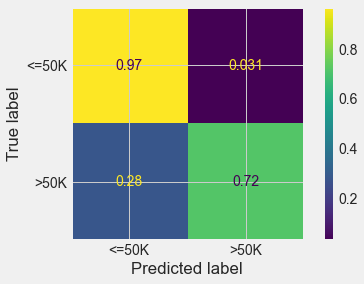

In [82]:
plot_confusion_matrix(pipe_rf2, x_train, y_train, normalize= "true")

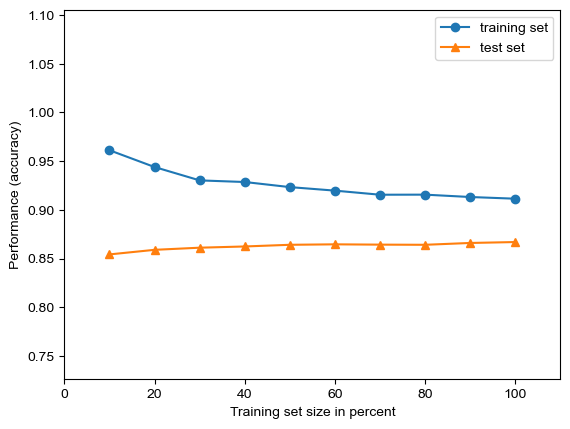

In [84]:
learning_curve_scalingRF2 = plot_learning_curves(x_train, 
                                            y_train, 
                                            x_test, y_test, pipe_rf2, 
                                            scoring= "accuracy", print_model = False)

In [85]:
report_scaling_rf2 = pd.DataFrame(classification_report(y_train, 
                                   pipe_rf2.predict(x_train), 
                                   output_dict= True))
report_scaling_rf2

,<=50K,>50K,accuracy,macro avg,weighted avg
precision,0.920279,0.873019,0.911522,0.896649,0.909564
recall,0.969573,0.713521,0.911522,0.841547,0.911522
f1-score,0.944283,0.785253,0.911522,0.864768,0.908228
support,19752.000000,5791.000000,0.911522,25543.000000,25543.000000


#### Random Forest with Balanced Dataset

In [86]:
# karena data imbalanced maka coba lakukan undersampling pada train data dan mencoba mencari tahu 
# apakah akan memengaruhi hasil atau tidak

In [87]:
# data utama 

data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32532,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32533,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32534,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [88]:
# melihat perbandingan dari data output yang ada

data.salary.value_counts()

<=50K    24690
>50K      7239
Name: salary, dtype: int64

In [89]:
# dengan melihat salah satu output punya jumlah data sebanyak lebih dari 3 kali data satunya
# maka dilakukan Undersampling dengan mencoba membuat data train menjadi seimbang dengan jumlah
# seluruh output punya jumlah sama 

# Namun untuk DATA TEST akan digunakan data yang sama dengan yang sebelumnya sehingga hasilnya bisa
# cukup akurat

# jadi hanya akan melakukan undersampling pada dataset trainnya saja dan tidak menyentuh bagian
# dataset testingnya

In [90]:
# membagi data utama menjadi 2 karena hanya akan di ambil data trainnya saja
# pembagian ini walaupun juga di acak namun akan menghasilkan urutan acak yang sama 
# tentunya karena menggunakan parameter "random_state" dengan nilai yang sama dengan saat
# pembagian dataset di awal tadi

train_balanced, test_balanced = train_test_split(data, test_size= 0.2, shuffle= True,
                                                 random_state= 42, stratify= data.salary)

In [91]:
train_balanced.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
19665,33,Private,HS-grad,9,Separated,Tech-support,Not-in-family,White,Male,0,0,46,United-States,<=50K
18594,29,Private,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,4386,0,40,United-States,>50K
3195,30,Private,HS-grad,9,Married-spouse-absent,Sales,Unmarried,White,Male,0,0,40,United-States,<=50K
17307,76,Other,Some-college,10,Widowed,Other,Unmarried,White,Female,0,0,40,United-States,<=50K
11184,65,Private,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,Other,<=50K


In [92]:
train_balanced.salary.value_counts() 

# melihat perbandingan output pada train dataset yang sudah dibagi

<=50K    19752
>50K      5791
Name: salary, dtype: int64

In [93]:
# ambil data di atas yang jumlahnya sedikit tadi yaitu ">50K"

train_balanced_less = train_balanced.loc[train_balanced.salary == ">50K"]
train_balanced_less.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
18594,29,Private,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,4386,0,40,United-States,>50K
32100,44,Federal-gov,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Male,13550,0,50,United-States,>50K
11359,28,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,40,United-States,>50K
28452,43,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
13894,43,Private,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,50,Canada,>50K


In [94]:
# ambil data di atas yang jumlahnya banyak tadi yaitu ">50K"
# kemudian dataset train tersebut sama lakukan undersampling ala ala dengan mengambil samplenya
# secara acak sejumlah output pada dataset yang jumlahnya sedikit tadi

train_balanced_over_data = train_balanced.loc[train_balanced.salary == "<=50K"]
train_balanced_over_data_balanced = train_balanced_over_data.sample(n = 5791, random_state = 42)
train_balanced_over_data_balanced

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
29549,38,Private,HS-grad,9,Divorced,Craft-repair,Unmarried,White,Male,0,0,50,United-States,<=50K
1652,26,Self-emp-not-inc,HS-grad,9,Never-married,Sales,Own-child,White,Male,0,0,40,United-States,<=50K
20944,80,Other,HS-grad,9,Married-civ-spouse,Other,Husband,White,Male,0,0,8,Canada,<=50K
12859,44,Federal-gov,HS-grad,9,Never-married,Craft-repair,Own-child,Black,Female,0,0,40,United-States,<=50K
12195,27,Private,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,45,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18865,44,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Wife,White,Female,3137,0,30,United-States,<=50K
23350,64,Private,Assoc-acdm,12,Never-married,Prof-specialty,Other-relative,White,Female,0,0,30,United-States,<=50K
3870,24,Private,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
4078,19,Private,Some-college,10,Never-married,Tech-support,Own-child,White,Male,0,1719,16,United-States,<=50K


In [95]:
# setelah sudah dapat, kemudian dua dataset tadi yaitu dataset dengan output sedikit dan
# dataset dengan output yang sudah diundersampling digabung kembali
# kemudian setelah di gabung diacak kembali secara random 

data_balanced = pd.concat([train_balanced_over_data_balanced, 
                           train_balanced_less], axis = "index")
data_balanced = shuffle(data_balanced, random_state= 42)
data_balanced

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
13181,32,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,32,United-States,>50K
15208,23,Private,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
31480,42,Self-emp-not-inc,Assoc-voc,11,Married-civ-spouse,Transport-moving,Husband,White,Male,4386,0,80,United-States,>50K
23280,39,Self-emp-not-inc,HS-grad,9,Divorced,Farming-fishing,Not-in-family,White,Male,8614,0,50,United-States,>50K
19709,33,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18396,45,Private,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,>50K
10719,36,Private,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,Male,0,0,45,United-States,<=50K
3055,34,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
7298,50,Private,1st-4th,2,Separated,Prof-specialty,Unmarried,Black,Female,0,0,40,United-States,<=50K


In [96]:
data_balanced.salary.value_counts()

# hasilnya sudah merata dan akan saya jadikan menjadi train data

>50K     5791
<=50K    5791
Name: salary, dtype: int64

In [97]:
data_balanced # balanced dataset yang akan digunakan

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
13181,32,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,32,United-States,>50K
15208,23,Private,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
31480,42,Self-emp-not-inc,Assoc-voc,11,Married-civ-spouse,Transport-moving,Husband,White,Male,4386,0,80,United-States,>50K
23280,39,Self-emp-not-inc,HS-grad,9,Divorced,Farming-fishing,Not-in-family,White,Male,8614,0,50,United-States,>50K
19709,33,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18396,45,Private,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,>50K
10719,36,Private,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,Male,0,0,45,United-States,<=50K
3055,34,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
7298,50,Private,1st-4th,2,Separated,Prof-specialty,Unmarried,Black,Female,0,0,40,United-States,<=50K


In [98]:
# pembagian input dan output pada balanced dataset

x_train_balanced = data_balanced.drop(["salary"], axis = "columns")
y_train_balanced = data_balanced["salary"]

In [99]:
x_train_balanced.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
13181,32,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,32,United-States
15208,23,Private,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States
31480,42,Self-emp-not-inc,Assoc-voc,11,Married-civ-spouse,Transport-moving,Husband,White,Male,4386,0,80,United-States
23280,39,Self-emp-not-inc,HS-grad,9,Divorced,Farming-fishing,Not-in-family,White,Male,8614,0,50,United-States
19709,33,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States


In [100]:
y_train_balanced.head()

13181     >50K
15208    <=50K
31480     >50K
23280     >50K
19709    <=50K
Name: salary, dtype: object

In [101]:
# setelah sudah siap lakukan fitting kembali pada model rf tadi yang menggunakan pipeline yang
# parameter sudah di adjust dengan menggunakan parameter hasil gridsearch

# dan disini saya akan tetap menggunakan datatest seperti sebelumnya yaitu menggunakan
# imbalanced data pada test datanya

In [102]:
# inisiasi algoritma untuk balanced dataset

In [122]:
# karena di bandingkan maka menggunakan pipeline yang sama dengan randomforest dengan normal 
# algrittma TANPA scaling dan one hot encoder dan membandingkannya dengan 2 algoritma yang sudah
# dibuat tadi yaitu algoritma awal dan dengan algoritma yang sudah menggunakan
# parameter berdasarkan Randomized Grid Search


pipe_rf_non_scaling_balancedData = pipe_rf_non_scaling 
            
pipe_rf_non_scaling_balancedData2 = pipe_rf_non_scaling2



In [124]:
# karena di bandingkan maka menggunakan pipeline yang sama dengan randomforest dengan normal 
# algrittma DENGAN scaling dan one hot encoder dan membandingkannya dengan 2 algoritma yang sudah
# dibuat tadi yaitu algoritma awal dan dengan algoritma yang sudah menggunakan
# parameter berdasarkan Randomized Grid Search

pipe_rf_for_balancedData = pipe_rf 

pipe_rf_for_balancedData2 = pipe_rf2

##### Balanced Data pada Random Forest NON-Scaling

In [131]:
# algoritma awal

pipe_rf_non_scaling_balancedData.fit(x_train_balanced, y_train_balanced)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=50),
                                                  ['education', 'education-num',
                                                   'native-country',
                                                   'occupation', 'workclass',
                                                   'relationship', 'race',
                                                   'sex',
                                                   'marital-status'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_jobs=-1, random_state=42))],
         verbose=0)

In [143]:
cvs_normal_rf_BalancedData = cross_val_score(pipe_rf_non_scaling_balancedData,
                                             x_train_balanced, y_train_balanced, scoring= "accuracy", 
                                             cv = stratkfold, n_jobs= -1, ).mean()

cvs_normal_rf_BalancedData

0.8081517327435648

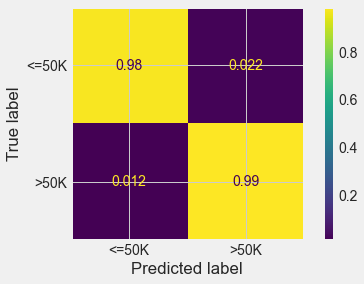

In [133]:
plot_confusion_matrix(pipe_rf_non_scaling_balancedData, x_train_balanced, y_train_balanced, 
                      normalize= "true")

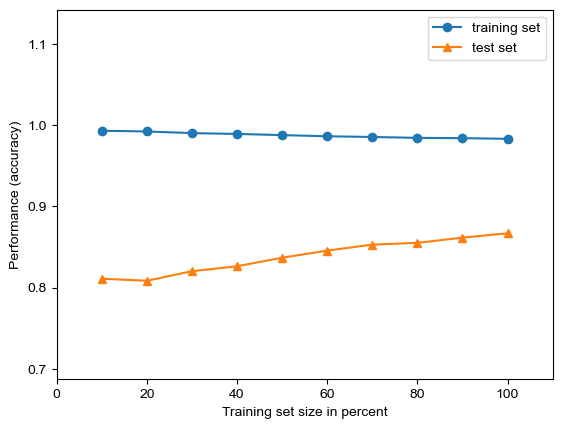

In [146]:
learning_curve_normalRF_balanced = plot_learning_curves(x_train_balanced, y_train_balanced, 
                                                        x_test, y_test,
                                                        pipe_rf_non_scaling_balancedData,
                                                        scoring= "accuracy", print_model= False)

In [164]:
report_normal_rf_balanced = pd.DataFrame(classification_report(y_train_balanced, 
                                                               pipe_rf_non_scaling_balancedData.predict(x_train_balanced), 
                                                               output_dict= True))
report_normal_rf_balanced

,<=50K,>50K,accuracy,macro avg,weighted avg
precision,0.987796,0.978618,0.983164,0.983207,0.983207
recall,0.978415,0.987912,0.983164,0.983164,0.983164
f1-score,0.983083,0.983243,0.983164,0.983163,0.983163
support,5791.000000,5791.000000,0.983164,11582.000000,11582.000000


In [120]:
# coba dengan algoritma yang sudah pakai parameter grid Search

In [137]:
pipe_rf_non_scaling_balancedData2.fit(x_train_balanced, y_train_balanced)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=50),
                                                  ['education', 'education-num',
                                                   'native-country',
                                                   'occupation', 'workclass',
                                                   'relationship', 'race',
                                                   'sex',
                                                   'marital-status'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=20,
                                        max_features='log2',
                                        min_samples_split=4, n_estimators=200,
                                        n_jobs=-1, random_state=42))])

In [144]:
cvs_normal_rf_BalancedData2 = cross_val_score(pipe_rf_non_scaling_balancedData, 
                                             x_train_balanced, y_train_balanced, 
                                             cv = stratkfold,
                                             n_jobs=-1).mean()

cvs_normal_rf_BalancedData2

0.8081517327435648

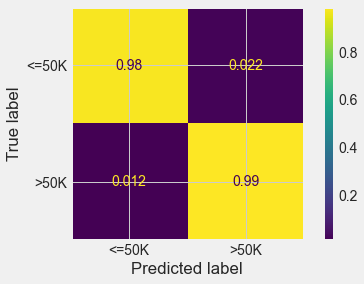

In [139]:
plot_confusion_matrix(pipe_rf_non_scaling_balancedData, 
                      x_train_balanced, 
                      y_train_balanced, normalize= "true")

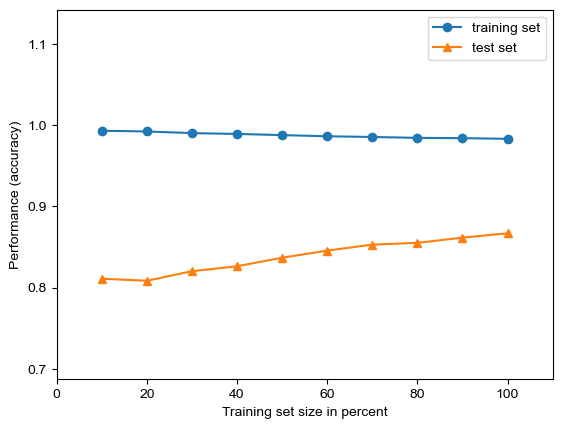

In [147]:
learning_curve_normalRF_balanced2 = plot_learning_curves(x_train_balanced, 
                                                        y_train_balanced, x_test, y_test,
                                                        pipe_rf_non_scaling_balancedData, 
                                                        scoring= "accuracy", print_model= False)

In [163]:
report_normal_rf_balanced2 = pd.DataFrame(classification_report(y_train_balanced, 
                                                               pipe_rf_non_scaling_balancedData.predict(x_train_balanced),
                                                               output_dict= True))
report_normal_rf_balanced2

,<=50K,>50K,accuracy,macro avg,weighted avg
precision,0.987796,0.978618,0.983164,0.983207,0.983207
recall,0.978415,0.987912,0.983164,0.983164,0.983164
f1-score,0.983083,0.983243,0.983164,0.983163,0.983163
support,5791.000000,5791.000000,0.983164,11582.000000,11582.000000


##### Balanced Data pada Random Forest dengan preproseing DENGAN scaling dan one hot encoding

In [148]:
pipe_rf_for_balancedData.fit(x_train_balanced, y_train_balanced)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=50),
                                                  ['education', 'education-num',
                                                   'native-country',
                                                   'occupation']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'relationship',
                                                   'race', 'sex',
                                                   'marital-status']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_jobs=-1, random_state=42))])

In [234]:
cvs_scaling_rf_BalancedData = cross_val_score(pipe_rf_for_balancedData, x_train_balanced,
                                              y_train_balanced, scoring= "accuracy", cv= stratkfold,
                                              n_jobs=-1).mean()
cvs_scaling_rf_BalancedData

0.8080656005808237

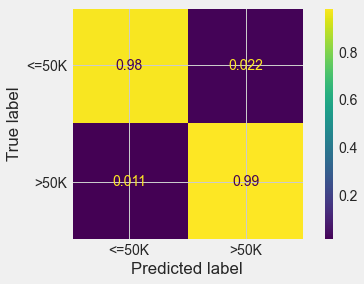

In [150]:
plot_confusion_matrix(pipe_rf_for_balancedData, x_train_balanced, y_train_balanced, normalize="true")

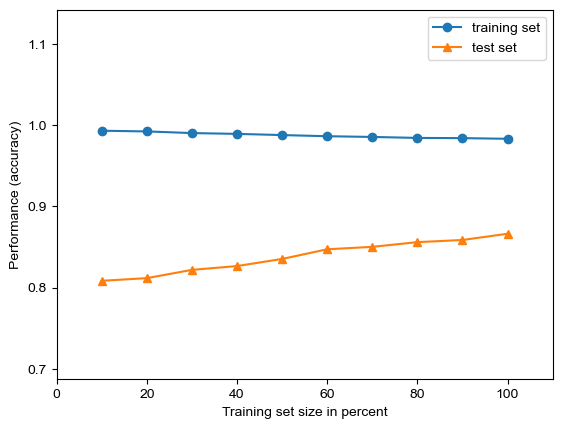

In [152]:
learning_curve_ScalingRF_Balanced = plot_learning_curves(x_train_balanced, y_train_balanced,
                                                         x_test, y_test, pipe_rf_for_balancedData, 
                                                         scoring= "accuracy", print_model= False)

In [154]:
report_scaling_rf_Balanced = pd.DataFrame(classification_report(y_train_balanced, 
                                                               pipe_rf_for_balancedData.predict(x_train_balanced),
                                                               output_dict= True))
report_scaling_rf_Balanced

,<=50K,>50K,accuracy,macro avg,weighted avg
precision,0.988648,0.977801,0.983164,0.983224,0.983224
recall,0.977551,0.988776,0.983164,0.983164,0.983164
f1-score,0.983069,0.983257,0.983164,0.983163,0.983163
support,5791.000000,5791.000000,0.983164,11582.000000,11582.000000


In [155]:
# algoritma RandomForest dengan Scaling dan One Hot Encoding

In [157]:
pipe_rf_for_balancedData2.fit(x_train_balanced, y_train_balanced)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=50),
                                                  ['education', 'education-num',
                                                   'native-country',
                                                   'occupation']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'relationship',
                                                   'race', 'sex',
                                                   'marital-status']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=20,
                                        max_features='log2',
                                        min_samples_split=4, n_estimators=200,
                                        n_jobs=-1))])

In [236]:
cvs_normal_rf_BalancedData2 = cross_val_score(pipe_rf_for_balancedData2,
                                             x_train_balanced, y_train_balanced, 
                                             scoring="accuracy",cv = stratkfold ,
                                              n_jobs= -1).mean()

cvs_normal_rf_BalancedData2

0.8206699673435738

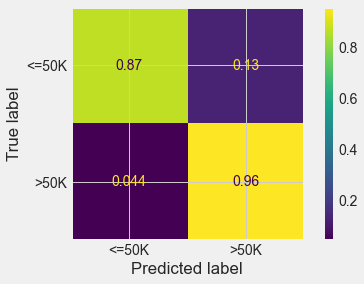

In [159]:
plot_confusion_matrix(pipe_rf_for_balancedData2, x_train_balanced, y_train_balanced, normalize= "true")

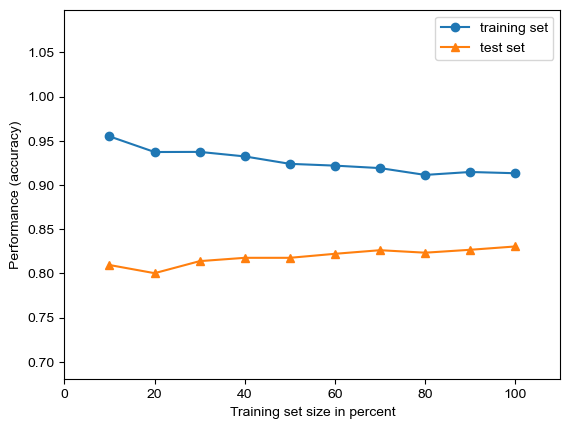

In [161]:
learning_curve_ScalingRF_Balanced2 = plot_learning_curves(x_train_balanced, y_train_balanced,
                                                          x_test, y_test, pipe_rf_for_balancedData2,
                                                          scoring= "accuracy", print_model= False)

In [162]:
report_scaling_rf_Balanced2 = pd.DataFrame(classification_report(y_train_balanced,
                                                                pipe_rf_for_balancedData2.predict(x_train_balanced),
                                                                output_dict= True))
report_scaling_rf_Balanced2

,<=50K,>50K,accuracy,macro avg,weighted avg
precision,0.954269,0.879278,0.9134,0.916774,0.916774
recall,0.868417,0.958384,0.9134,0.913400,0.913400
f1-score,0.909321,0.917128,0.9134,0.913225,0.913225
support,5791.000000,5791.000000,0.9134,11582.000000,11582.000000


### Testing dan Perbandingan semua hasil algoritma Random Forest

testing Random Forest menggunakan Testing Data dimana berarti akan melakukan testing dengan satu jenis testing dataset saja untuk semua model yang di test dan berarti akan melakukan testing dan perbandingan untuk total 8 Model dimana

- RF tanpa scaling
- RF tanpa scaling ( dengan parameter dari randomized grid search )
- RF dengan scaling dan one hot encoding
- RF dengan scaling dan one hot encoing ( dengan parameter didapatkan dari randomized grid search )

- RF tanpa scaling yang ditraining dengan dataset yang seimbang
- RF tanpa scaling yang ditraining dengan dataset yang seimbang ( dengan parameter dari randomized grid search pada hasil training algoritma RF dengan full dataset  )
- RF dengan scaling dan one hot encoding yang ditraining dengan dataset yang seimbang
- RF dengan scaling dan one hot encoding yang ditraining dengan dataset yang seimbang ( dengan parameter dari randomized grid search pada hasil training algoritma RF dengan full dataset  )


##### Testing RF non Balanced Data

In [167]:
# test model normal NON-scaling

y_pred_rf = pipe_rf_non_scaling.predict(x_test)
y_pred_rf

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '>50K', '<=50K'],
      dtype=object)

In [448]:
# hitung akurasi hasil prediksi model

akurasi_test_normalRF = accuracy_score(y_test, y_pred_rf)
akurasi_test_normalRF

0.866896335734419

In [170]:
# hitung cross validasi skor namun saat ini menggunakan testing dataset

cvs_normal_rf_test = cross_val_score(pipe_rf_non_scaling, x_test, y_test,
                                     scoring= "accuracy", cv= stratkfold, n_jobs= -1).mean()
cvs_normal_rf_test

0.8518656181411097

In [171]:
# lihat laporan model yang menggunakan testing dataset

report_normal_rf_test = pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict= True))
report_normal_rf_test

,<=50K,>50K,accuracy,macro avg,weighted avg
precision,0.984131,0.638170,0.866896,0.811150,0.905686
recall,0.841434,0.953729,0.866896,0.897582,0.866896
f1-score,0.907205,0.764673,0.866896,0.835939,0.874887
support,4938.000000,1448.000000,0.866896,6386.000000,6386.000000


In [172]:
# test model normal NON-scaling GRID SEARCH

y_pred_rf2 = pipe_rf_non_scaling2.predict(x_test)
y_pred_rf2

array(['>50K', '<=50K', '<=50K', ..., '>50K', '>50K', '<=50K'],
      dtype=object)

In [449]:
akurasi_test_normalRF2 = accuracy_score(y_test, y_pred_rf2)
akurasi_test_normalRF2

0.8415283432508612

In [173]:
cvs_normal_rf_test2 = cross_val_score(pipe_rf_non_scaling2, x_test, y_test,
                                     scoring= "accuracy", cv= stratkfold, n_jobs= -1).mean()
cvs_normal_rf_test2

0.8603218370520697

In [174]:
report_normal_rf_test2 = pd.DataFrame(classification_report(y_test, y_pred_rf2, output_dict= True))
report_normal_rf_test2

,<=50K,>50K,accuracy,macro avg,weighted avg
precision,0.981600,0.594372,0.841528,0.787986,0.893797
recall,0.810247,0.948204,0.841528,0.879226,0.841528
f1-score,0.887730,0.730708,0.841528,0.809219,0.852126
support,4938.000000,1448.000000,0.841528,6386.000000,6386.000000


In [175]:
# test model normal DENGAN-scaling 

y_pred_rf_scaling = pipe_rf.predict(x_test)
y_pred_rf_scaling

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '>50K', '<=50K'],
      dtype=object)

In [450]:
akurasi_test_scaling = accuracy_score(y_test, y_pred_rf_scaling)
akurasi_test_scaling

0.8662699655496399

In [178]:
cvs_scaling_rf_test = cross_val_score(pipe_rf, x_test, y_test,
                               scoring= "accuracy", cv= stratkfold, n_jobs= -1).mean()
cvs_scaling_rf_test

0.8490462657612777

In [179]:
report_scaling_rf_test = pd.DataFrame(classification_report(y_test, y_pred_rf_scaling, 
                                                             output_dict= True))
report_scaling_rf_test

,<=50K,>50K,accuracy,macro avg,weighted avg
precision,0.984805,0.636615,0.86627,0.810710,0.905854
recall,0.840016,0.955801,0.86627,0.897909,0.866270
f1-score,0.906667,0.764219,0.86627,0.835443,0.874367
support,4938.000000,1448.000000,0.86627,6386.000000,6386.000000


In [180]:
# test model normal DENGAN-scaling GRID SEARCH

y_pred_rf_scaling2 = pipe_rf2.predict(x_test)
y_pred_rf_scaling2

array(['>50K', '<=50K', '<=50K', ..., '>50K', '>50K', '<=50K'],
      dtype=object)

In [451]:
akurasi_test_scaling2 = accuracy_score(y_test, y_pred_rf_scaling2)
akurasi_test_scaling2

0.8305668650172252

In [181]:
cvs_scaling_rf_test2 = cross_val_score(pipe_rf2, x_test, y_test,
                               scoring= "accuracy", cv= stratkfold, n_jobs= -1).mean()
cvs_scaling_rf_test2

0.8585997845596156

In [182]:
report_scaling_rf_test2 = pd.DataFrame(classification_report(y_test, y_pred_rf_scaling2, 
                                                             output_dict= True))
report_scaling_rf_test2

,<=50K,>50K,accuracy,macro avg,weighted avg
precision,0.979125,0.577477,0.830567,0.778301,0.888053
recall,0.797894,0.941989,0.830567,0.869941,0.830567
f1-score,0.879268,0.716010,0.830567,0.797639,0.842250
support,4938.000000,1448.000000,0.830567,6386.000000,6386.000000


##### Testing RF Balanced Data

In [183]:
# test model normal NON-scaling balanced data

y_pred_rf_balanced = pipe_rf_non_scaling_balancedData.predict(x_test)
y_pred_rf_balanced

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '>50K', '<=50K'],
      dtype=object)

In [452]:
akurasi_test_normalRF_balanced = accuracy_score(y_test, y_pred_rf_balanced)
akurasi_test_normalRF_balanced

0.866896335734419

In [184]:
cvs_normal_rf_test_balanced = cross_val_score(pipe_rf_non_scaling_balancedData, x_test, y_test,
                                             scoring= "accuracy", cv= stratkfold, n_jobs= -1).mean()
cvs_normal_rf_test_balanced

0.8518656181411097

In [185]:
report_normal_rf_test_balanced = pd.DataFrame(classification_report(y_test, 
                                                                    y_pred_rf_balanced, 
                                                                    output_dict= True))
report_normal_rf_test_balanced

,<=50K,>50K,accuracy,macro avg,weighted avg
precision,0.984131,0.638170,0.866896,0.811150,0.905686
recall,0.841434,0.953729,0.866896,0.897582,0.866896
f1-score,0.907205,0.764673,0.866896,0.835939,0.874887
support,4938.000000,1448.000000,0.866896,6386.000000,6386.000000


In [455]:
# test model normal NON-scaling balanced data GRID SEARCH

y_pred_rf_balanced2 = pipe_rf_non_scaling_balancedData2.predict(x_test)
y_pred_rf_balanced2

array(['>50K', '<=50K', '<=50K', ..., '>50K', '>50K', '<=50K'],
      dtype=object)

In [456]:
akurasi_test_normalRF_balanced2 = accuracy_score(y_test, y_pred_rf_balanced2)
akurasi_test_normalRF_balanced2

0.8415283432508612

In [457]:
cvs_normal_rf_test_balanced2 = cross_val_score(pipe_rf_non_scaling_balancedData2, x_test, y_test,
                                             scoring= "accuracy", cv= stratkfold, n_jobs= -1).mean()
cvs_normal_rf_test_balanced2

0.8603218370520697

In [458]:
report_normal_rf_test_balanced2 = pd.DataFrame(classification_report(y_test, 
                                                                    y_pred_rf_balanced2, 
                                                                    output_dict= True))
report_normal_rf_test_balanced2

,<=50K,>50K,accuracy,macro avg,weighted avg
precision,0.981600,0.594372,0.841528,0.787986,0.893797
recall,0.810247,0.948204,0.841528,0.879226,0.841528
f1-score,0.887730,0.730708,0.841528,0.809219,0.852126
support,4938.000000,1448.000000,0.841528,6386.000000,6386.000000


In [189]:
# test model normal DENGAN-scaling dan One Hot Encoding balanced data 

y_pred_rf_scaling_balanced = pipe_rf_for_balancedData.predict(x_test)
y_pred_rf_scaling_balanced

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '>50K', '<=50K'],
      dtype=object)

In [460]:
akurasi_test_scaling_balanced = accuracy_score(y_test, y_pred_rf_scaling_balanced)
akurasi_test_scaling_balanced

0.8662699655496399

In [190]:
cvs_scaling_rf_test_balanced = cross_val_score(pipe_rf_for_balancedData, x_test, y_test,
                                             scoring= "accuracy", cv= stratkfold, n_jobs= -1).mean()
cvs_scaling_rf_test_balanced

0.8490462657612777

In [191]:
report_scaling_rf_test_balanced = pd.DataFrame(classification_report(y_test, 
                                                                    y_pred_rf_scaling_balanced, 
                                                                    output_dict= True))
report_scaling_rf_test_balanced

,<=50K,>50K,accuracy,macro avg,weighted avg
precision,0.984805,0.636615,0.86627,0.810710,0.905854
recall,0.840016,0.955801,0.86627,0.897909,0.866270
f1-score,0.906667,0.764219,0.86627,0.835443,0.874367
support,4938.000000,1448.000000,0.86627,6386.000000,6386.000000


In [192]:
# test model normal DENGAN-scaling dan One Hot Encoding balanced data GRID Search

y_pred_rf_scaling_balanced2 = pipe_rf_for_balancedData2.predict(x_test)
y_pred_rf_scaling_balanced2

array(['>50K', '<=50K', '<=50K', ..., '>50K', '>50K', '<=50K'],
      dtype=object)

In [461]:
akurasi_test_scaling_balanced2 = accuracy_score(y_test, y_pred_rf_scaling_balanced2)
akurasi_test_scaling_balanced2

0.8305668650172252

In [193]:
cvs_scaling_rf_test_balanced2 = cross_val_score(pipe_rf_for_balancedData2, x_test, y_test,
                                             scoring= "accuracy", cv= stratkfold, n_jobs= -1).mean()
cvs_scaling_rf_test_balanced2

0.8586000296567537

In [194]:
report_scaling_rf_test_balanced2 = pd.DataFrame(classification_report(y_test, 
                                                                    y_pred_rf_scaling_balanced2, 
                                                                    output_dict= True))
report_scaling_rf_test_balanced2

,<=50K,>50K,accuracy,macro avg,weighted avg
precision,0.979125,0.577477,0.830567,0.778301,0.888053
recall,0.797894,0.941989,0.830567,0.869941,0.830567
f1-score,0.879268,0.716010,0.830567,0.797639,0.842250
support,4938.000000,1448.000000,0.830567,6386.000000,6386.000000


### Membandingkan hasil Training dan Testing dari seluruh model RF yang dibuat

In [214]:
# Membuat dataframe yang berisi hasil training tiap model pada learning curve tadi

training_learningCurve = pd.DataFrame(data = {"Training_normalRF" : learning_curve_normalRF[0],
                                              "Training_normalRF_GS" : learning_curve_normalRF2[0],
                                              "Training_scalingRF" : learning_curve_ScalingRF[0],
                                              "Training_scalingRF_GS" : learning_curve_scalingRF2[0],
                                              "Training_normalRF_Balanced" : learning_curve_normalRF_balanced[0],
                                              "Training_normalRF_GS_Balanced" : learning_curve_normalRF_balanced2[0],
                                              "Training_scalingRF_Balanced" : learning_curve_ScalingRF_Balanced[0],
                                              "Training_scalingRF_Balanced_GS" : learning_curve_ScalingRF_Balanced2[0]},
                                    index= ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"]).round(3)

training_learningCurve

,Training_normalRF,Training_normalRF_GS,Training_scalingRF,Training_scalingRF_GS,Training_normalRF_Balanced,Training_normalRF_GS_Balanced,Training_scalingRF_Balanced,Training_scalingRF_Balanced_GS
10%,0.997,0.973,0.997,0.961,0.993,0.993,0.993,0.955
20%,0.992,0.958,0.992,0.944,0.992,0.992,0.992,0.937
30%,0.990,0.945,0.990,0.930,0.990,0.990,0.990,0.938
40%,0.987,0.939,0.987,0.929,0.989,0.989,0.989,0.932
50%,0.985,0.936,0.985,0.923,0.988,0.988,0.988,0.924
60%,0.983,0.932,0.983,0.920,0.986,0.986,0.986,0.922
70%,0.982,0.931,0.981,0.916,0.985,0.985,0.985,0.919
80%,0.981,0.927,0.981,0.916,0.984,0.984,0.984,0.911
90%,0.980,0.924,0.980,0.913,0.984,0.984,0.984,0.915
100%,0.979,0.924,0.979,0.912,0.983,0.983,0.983,0.913


In [215]:
# Membuat dataframe yang berisi hasil testing tiap model pada learning curve tadi

testing_learningCurve = pd.DataFrame(data = {"Testing_normalRF" : learning_curve_normalRF[1],
                                              "Testing_normalRF_GS" : learning_curve_normalRF2[1],
                                              "Testing_scalingRF" : learning_curve_ScalingRF[1],
                                              "Testing_scalingRF_GS" : learning_curve_scalingRF2[1],
                                              "Testing_normalRF_Balanced" : learning_curve_normalRF_balanced[1],
                                              "Testing_normalRF_GS_Balanced" : learning_curve_normalRF_balanced2[1],
                                              "Testing_scalingRF_Balanced" : learning_curve_ScalingRF_Balanced[1],
                                              "Testing_scalingRF_Balanced_GS" : learning_curve_ScalingRF_Balanced2[1]},
                                    index= ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"]).round(3)

testing_learningCurve

,Testing_normalRF,Testing_normalRF_GS,Testing_scalingRF,Testing_scalingRF_GS,Testing_normalRF_Balanced,Testing_normalRF_GS_Balanced,Testing_scalingRF_Balanced,Testing_scalingRF_Balanced_GS
10%,0.846,0.852,0.849,0.854,0.811,0.811,0.808,0.810
20%,0.849,0.858,0.850,0.859,0.808,0.808,0.812,0.800
30%,0.850,0.860,0.850,0.861,0.820,0.820,0.822,0.814
40%,0.855,0.863,0.852,0.863,0.826,0.826,0.826,0.818
50%,0.856,0.863,0.855,0.864,0.837,0.837,0.835,0.818
60%,0.853,0.863,0.852,0.865,0.846,0.846,0.847,0.822
70%,0.853,0.866,0.851,0.864,0.853,0.853,0.850,0.826
80%,0.853,0.867,0.849,0.864,0.855,0.855,0.856,0.824
90%,0.851,0.865,0.851,0.866,0.862,0.862,0.859,0.827
100%,0.851,0.868,0.853,0.867,0.867,0.867,0.866,0.831


In [524]:
# pindahkan hasil akurasi TESTING tiap model pada tiap 10% dataset ke excel

testing_learningCurve.to_excel("Akurasi Model.xlsx") 

<AxesSubplot:title={'center':'Akurasi Model Random Forest tiap Algoritma \nPada Testing Data'}>

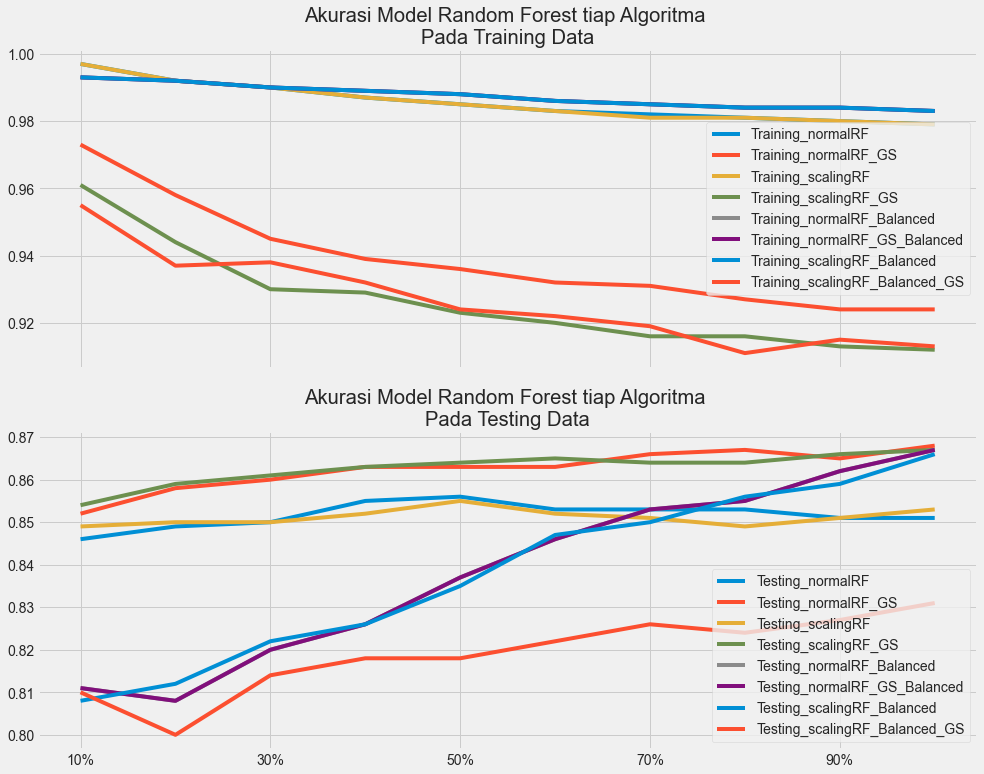

In [216]:
# berdasarkan dua dataframe diatas dilakukan plot masing masing untuk training dan testing
# sehingga bisa melihat perbandingan untuk tiap model baik secara training dan testingnya

fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (15, 12))

training_learningCurve.plot(ax = ax[0], sharex = True,
                            title = "Akurasi Model Random Forest tiap Algoritma \nPada Training Data")
testing_learningCurve.plot(ax = ax[1],
                           title = "Akurasi Model Random Forest tiap Algoritma \nPada Testing Data")

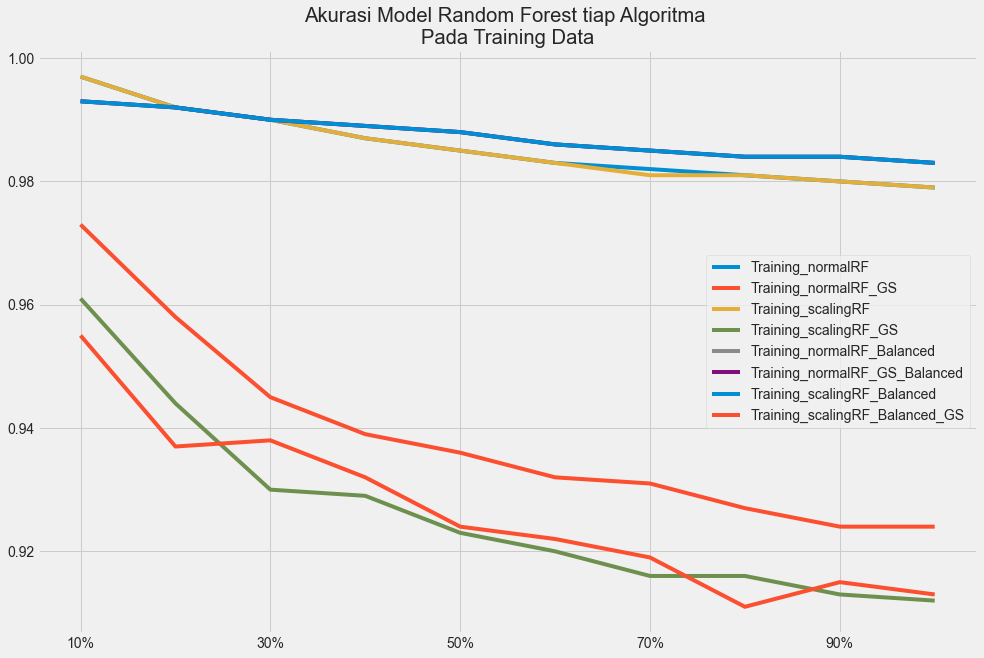

In [536]:
training_learningCurve.plot(figsize = (15, 10),
                            title = "Akurasi Model Random Forest tiap Algoritma \nPada Training Data")
plt.savefig("Akurasi Model Random Forest tiap Algoritma Pada Training Data.png")

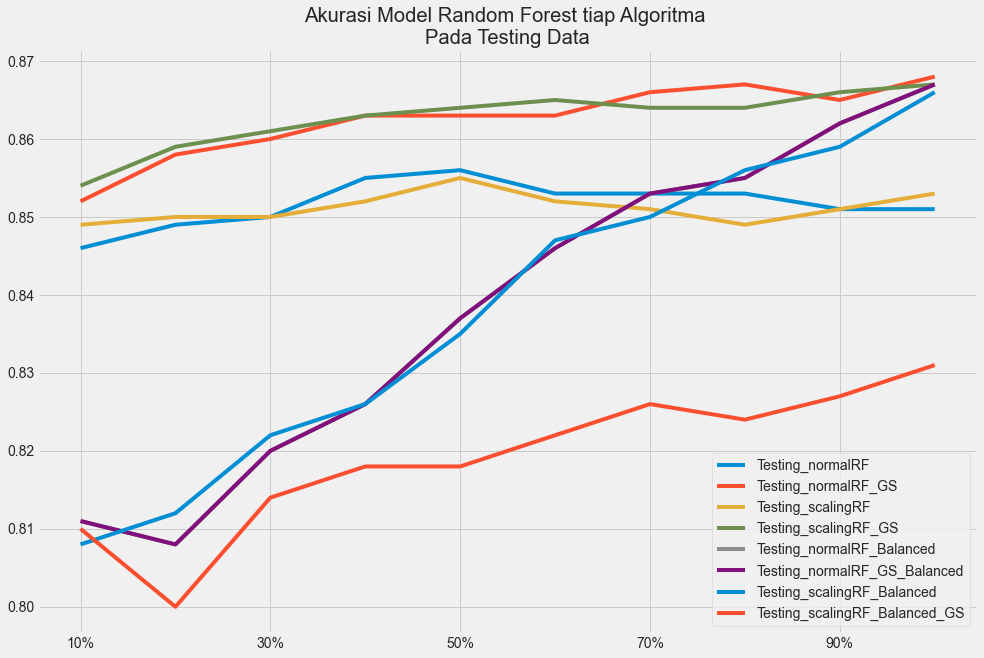

In [537]:
testing_learningCurve.plot(figsize = (15,10),
                           title = "Akurasi Model Random Forest tiap Algoritma \nPada Testing Data")

plt.savefig("Akurasi Model Random Forest tiap Algoritma Pada Testing Data.png")

In [469]:
# Dataframe untuk info Akurasi model pada testing dataset dan
# skor Cross Validasi model pada testing dataset untuk semua model yang ditraining

akurasi_testing_dan_ScoreCV = pd.DataFrame(data = {"normalRF" : [akurasi_test_normalRF, cvs_normal_rf],
                                         "normalRF_GS" : [akurasi_test_normalRF2, cvs_normal_rf2],
                                         "scalingRF" : [akurasi_test_scaling, cvs_scaling_rf],
                                         "scalingRF_GS" : [akurasi_test_scaling2, cvs_scaling_rf2],
                                         "normalRF_Balanced" : [akurasi_test_normalRF_balanced, 
                                                                cvs_normal_rf_BalancedData],
                                         "normalRF_GS_Balanced" : [akurasi_test_normalRF_balanced2,
                                                                  cvs_normal_rf_BalancedData2],
                                         "scalingRF_Balanced" : [akurasi_test_scaling_balanced,
                                                                 cvs_scaling_rf_BalancedData],
                                         "scalingRF_Balanced_GS" : [akurasi_test_scaling_balanced2,
                                                                    cvs_scaling_rf_test_balanced2]},
                                index = ["Akurasi Model pada Testing Data", 
                                         "Score Cross Validation"]).round(3).T

akurasi_testing_dan_ScoreCV

,Akurasi Model pada Testing Data,Score Cross Validation
normalRF,0.867,0.846
normalRF_GS,0.842,0.859
scalingRF,0.866,0.844
scalingRF_GS,0.831,0.859
normalRF_Balanced,0.867,0.808
normalRF_GS_Balanced,0.842,0.821
scalingRF_Balanced,0.866,0.808
scalingRF_Balanced_GS,0.831,0.859


In [527]:
# pindahkan hasil akurasi TESTING data dan Skor Corss Validasi

akurasi_testing_dan_ScoreCV.to_excel("Akurasi Testing dan Skor Cross Validation.xlsx") 

[]

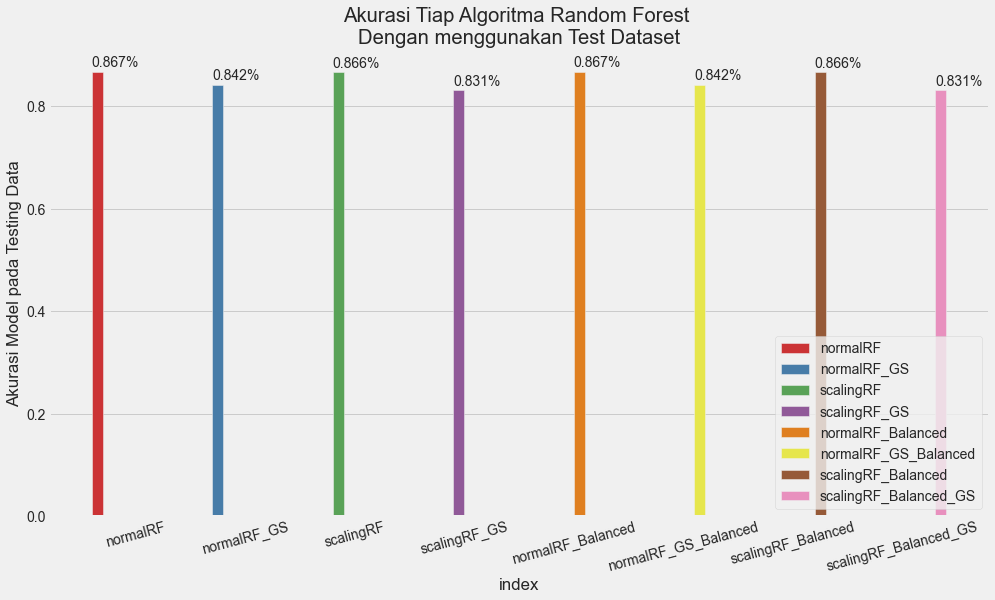

In [550]:
# Melakukan plotting untuk melihat akurasi model pada testing datset sehingga cukup dapat dibandingkan
# pada tiap model

plt.figure(figsize = (15, 8))

ax = sns.barplot(data = akurasi_testing_dan_ScoreCV.reset_index(),
                 x = "index", 
                 y = "Akurasi Model pada Testing Data",
                 hue = "index", palette= "Set1")

plt.xticks(rotation = 15)
plt.legend(loc = "lower right")
plt.title("Akurasi Tiap Algoritma Random Forest \nDengan menggunakan Test Dataset")

for p in ax.patches:
    ax.annotate("{:.3f}%".format((p.get_height())),
                (p.get_x(), p.get_height() + 0.01))

plt.savefig("Akurasi Tiap Algoritma Random Forest Dengan menggunakan Test Dataset.png", 
            pad_inches = 1) # save gambar
plt.plot()

[]

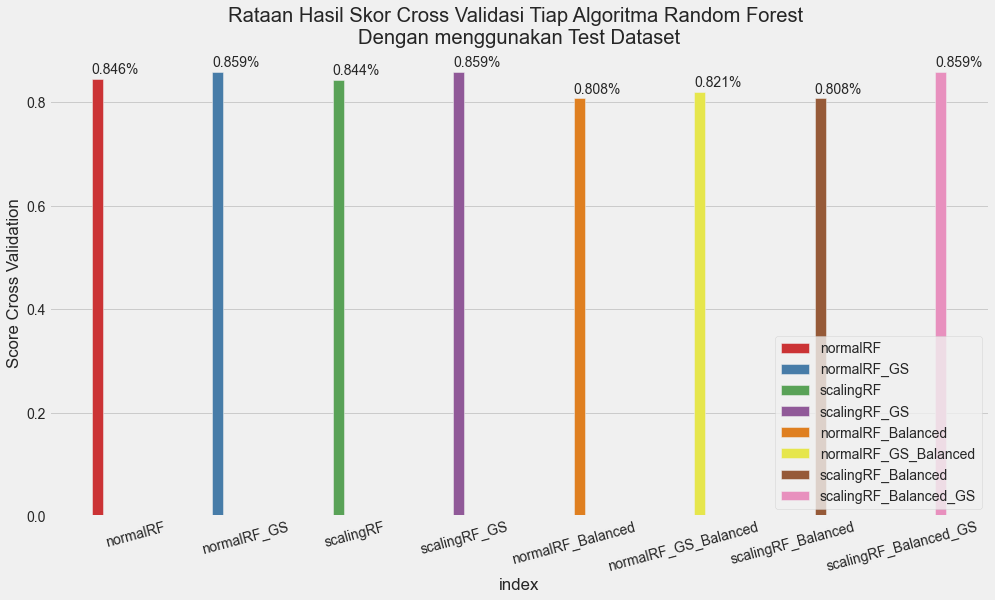

In [551]:
# Melakukan plotting untuk melihat skor cross validasi model pada testing datset sehingga cukup dapat 
# dibandingkan pada tiap model

plt.figure(figsize = (15, 8))

ax = sns.barplot(data = akurasi_testing_dan_ScoreCV.reset_index(),x = "index", 
                 y = "Score Cross Validation",
                 hue = "index", palette= "Set1")

plt.xticks(rotation = 15)
plt.legend(loc = "lower right")
plt.title("Rataan Hasil Skor Cross Validasi Tiap Algoritma Random Forest \nDengan menggunakan Test Dataset")

for p in ax.patches:
    ax.annotate("{:.3f}%".format((p.get_height())),
                (p.get_x(), p.get_height() + 0.01))
    

plt.savefig("Rataan Hasil Skor Cross Validasi Tiap Algoritma Random Forest Dengan menggunakan Test Dataset.png")
plt.plot()

In [299]:
y_test_akhir = y_test.copy()
y_test_akhir.name = "True Output"

In [311]:
# Dataframe dengan isi hasil prediksi dari tiap model yang dibuat dengan melakuan prediksi terhadap
# testing dataset dan dibandingkan dengan Output yang Benar

true_output_vs_prediction = pd.concat([y_test_akhir.reset_index(drop = True), 
                                       pd.DataFrame(y_pred_rf), pd.DataFrame(y_pred_rf2),
                                       pd.DataFrame(y_pred_rf_scaling), pd.DataFrame(y_pred_rf_scaling2),
                                       pd.DataFrame(y_pred_rf_balanced), pd.DataFrame(y_pred_rf_balanced2),
                                       pd.DataFrame(y_pred_rf_scaling_balanced), pd.DataFrame(y_pred_rf_scaling_balanced2)], 
                                       axis = "columns")
true_output_vs_prediction.columns = ["True Output", "NormalRF", "NormalRF GS", "ScalingRF", "ScalingRF GS",
                                     "NormalRF Balanced", "NormalRF GS Balanced",
                                     "ScalingRF Balanced", "ScalingRF GS Balanced"]

true_output_vs_prediction

,True Output,NormalRF,NormalRF GS,ScalingRF,ScalingRF GS,NormalRF Balanced,NormalRF GS Balanced,ScalingRF Balanced,ScalingRF GS Balanced
0,<=50K,<=50K,>50K,<=50K,>50K,<=50K,>50K,<=50K,>50K
1,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K
2,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K
3,>50K,>50K,>50K,>50K,>50K,>50K,>50K,>50K,>50K
4,<=50K,>50K,>50K,>50K,>50K,>50K,>50K,>50K,>50K
...,...,...,...,...,...,...,...,...,...
6381,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K
6382,>50K,>50K,>50K,>50K,>50K,>50K,>50K,>50K,>50K
6383,<=50K,>50K,>50K,>50K,>50K,>50K,>50K,>50K,>50K
6384,>50K,>50K,>50K,>50K,>50K,>50K,>50K,>50K,>50K


In [519]:
# pindahkan hasil dataframe true vs prediction ke excel

true_output_vs_prediction.to_excel("True Output VS Prediction.xlsx") 

In [314]:
# Menggabungkan kumpulan hasil prediksi dengan testing dataset menjadi sebuah Dataframe baru

fullTestData_prediction = pd.concat([x_test.reset_index(drop = True),
                                     true_output_vs_prediction], axis = "columns")

fullTestData_prediction

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,...,native-country,True Output,NormalRF,NormalRF GS,ScalingRF,ScalingRF GS,NormalRF Balanced,NormalRF GS Balanced,ScalingRF Balanced,ScalingRF GS Balanced
0,38,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,...,Italy,<=50K,<=50K,>50K,<=50K,>50K,<=50K,>50K,<=50K,>50K
1,28,Private,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,...,United-States,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K
2,41,Private,5th-6th,3,Married-civ-spouse,Farming-fishing,Wife,White,Female,0,...,Mexico,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K
3,48,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,...,United-States,>50K,>50K,>50K,>50K,>50K,>50K,>50K,>50K,>50K
4,57,Private,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,United-States,<=50K,>50K,>50K,>50K,>50K,>50K,>50K,>50K,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6381,41,Private,Assoc-voc,11,Never-married,Prof-specialty,Not-in-family,White,Female,0,...,United-States,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K
6382,36,Private,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,...,United-States,>50K,>50K,>50K,>50K,>50K,>50K,>50K,>50K,>50K
6383,52,Private,Bachelors,13,Married-spouse-absent,Other-service,Not-in-family,White,Male,0,...,United-States,<=50K,>50K,>50K,>50K,>50K,>50K,>50K,>50K,>50K
6384,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,...,United-States,>50K,>50K,>50K,>50K,>50K,>50K,>50K,>50K,>50K


In [521]:
# pindahkan hasil dataframe gabungan testing dataset dengan hasil prediksi ke excel

fullTestData_prediction.to_excel("Testing Dataset with Prediction.xlsx") 

##### Viisualisasikan Recall, Precision, F1-Score pada Testing Data

In [446]:
# Dari hasil laporan yang ada pada tiap pelatihan model tadi disini diambil hanya bagian
# testing saja pada kemudian digabungkan menjadi satu seperti di bawah hasilnya

test_precision_recal_f1score = pd.concat([report_normal_rf_test.iloc[:-1, :-3], 
                                          report_normal_rf_test2.iloc[:-1, :-3],
                                          report_scaling_rf_test.iloc[:-1, :-3], 
                                          report_scaling_rf_test2.iloc[:-1, :-3],
                                          report_normal_rf_test_balanced.iloc[:-1, :-3], 
                                          report_normal_rf_test_balanced2.iloc[:-1, :-3],
                                          report_scaling_rf_test_balanced.iloc[:-1, :-3], 
                                          report_scaling_rf_test_balanced2.iloc[:-1, :-3]],
                                          axis = "columns")

test_precision_recal_f1score.columns = ["NormalRF <=50K", "NormalRF >50K", 
                                        "NormalRF_GS <=50K", "NormalRF_GS >50K",
                                        "ScalingRF <=50K", "ScalingRF >50K",
                                        "ScalingRF_GS <=50K", "ScalingRF_GS >50K",
                                        "NormalRF_Balanced <=50K", "NormalRF_Balanced >50K",
                                        "NormalRF_Balanced_GS <=50K", "NormalRF_Balanced_GS >50K",
                                        "ScalingRF_Balanced <=50K", "ScalingRF_Balanced >50K",
                                        "ScalingRF_Balanced_GS <=50K", "ScalingRF_Balanced_GS >50K"]

test_precision_recal_f1score = test_precision_recal_f1score.T
test_precision_recal_f1score.reset_index(inplace = True)
test_precision_recal_f1score.columns = ['Model/Output', 'Precision', 'Recall', 'F1-Score']
test_precision_recal_f1score

,Model/Output,Precision,Recall,F1-Score
0,NormalRF <=50K,0.984131,0.841434,0.907205
1,NormalRF >50K,0.638170,0.953729,0.764673
2,NormalRF_GS <=50K,0.981600,0.810247,0.887730
3,NormalRF_GS >50K,0.594372,0.948204,0.730708
4,ScalingRF <=50K,0.984805,0.840016,0.906667
5,ScalingRF >50K,0.636615,0.955801,0.764219
6,ScalingRF_GS <=50K,0.979125,0.797894,0.879268
7,ScalingRF_GS >50K,0.577477,0.941989,0.716010
8,NormalRF_Balanced <=50K,0.984131,0.841434,0.907205
9,NormalRF_Balanced >50K,0.638170,0.953729,0.764673


In [526]:
# pindahkan hasil dataframe berisi precision, recall, dan f1score ke excel

test_precision_recal_f1score.to_excel("Test Precision Recall and F1Score.xlsx") 

In [447]:
test_precision_recal_f1score["Model"] = test_precision_recal_f1score["Model/Output"].str.split(" ", 
                                                                                     expand = True)[0]
test_precision_recal_f1score["Output"] = test_precision_recal_f1score["Model/Output"].str.split(" ", 
                                                                                     expand = True)[1]
test_precision_recal_f1score = test_precision_recal_f1score[["Model", "Output", 
                                                             'Model/Output', 'Precision', 
                                                             'Recall', 'F1-Score']]
test_precision_recal_f1score

# melakukan sediit adjustment pada dataframe yang dibuat sebelumnya

,Model,Output,Model/Output,Precision,Recall,F1-Score
0,NormalRF,<=50K,NormalRF <=50K,0.984131,0.841434,0.907205
1,NormalRF,>50K,NormalRF >50K,0.638170,0.953729,0.764673
2,NormalRF_GS,<=50K,NormalRF_GS <=50K,0.981600,0.810247,0.887730
3,NormalRF_GS,>50K,NormalRF_GS >50K,0.594372,0.948204,0.730708
4,ScalingRF,<=50K,ScalingRF <=50K,0.984805,0.840016,0.906667
5,ScalingRF,>50K,ScalingRF >50K,0.636615,0.955801,0.764219
6,ScalingRF_GS,<=50K,ScalingRF_GS <=50K,0.979125,0.797894,0.879268
7,ScalingRF_GS,>50K,ScalingRF_GS >50K,0.577477,0.941989,0.716010
8,NormalRF_Balanced,<=50K,NormalRF_Balanced <=50K,0.984131,0.841434,0.907205
9,NormalRF_Balanced,>50K,NormalRF_Balanced >50K,0.638170,0.953729,0.764673


[]

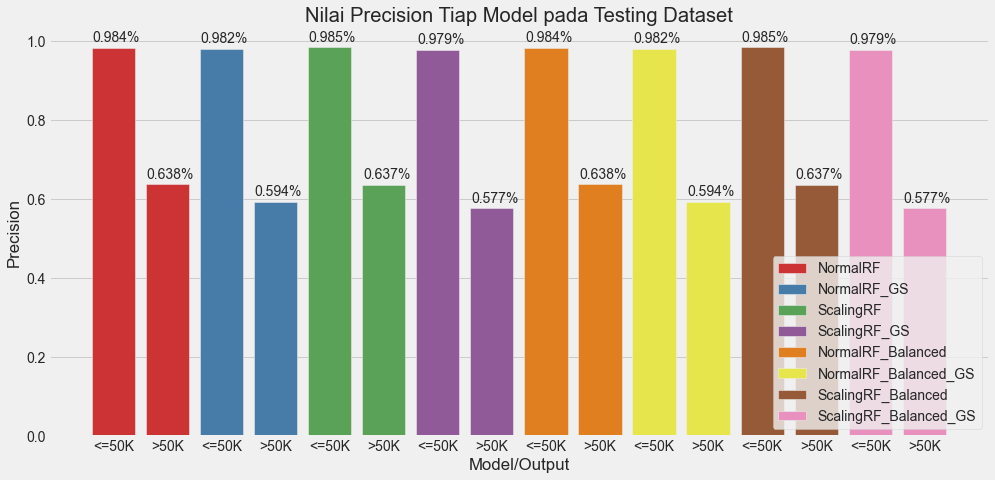

In [553]:
# Melakukan viwualisasi untuk melihat perbandingan nilai Precision pada tiap model yang 
# menggunakan testing dataset

plt.figure(figsize = (15, 7))

ax = sns.barplot(data = test_precision_recal_f1score,
                 x = "Model/Output", y = "Precision", hue = "Model", palette= "Set1", dodge = False)

for p in ax.patches:
    ax.annotate("{:.3f}%".format((p.get_height())),
                (p.get_x() + 0.015, p.get_height() + 0.015))

plt.title("Nilai Precision Tiap Model pada Testing Dataset")
plt.xticks(ticks= test_precision_recal_f1score.index  ,
           labels = test_precision_recal_f1score.Output)
plt.legend(loc = "lower right")
plt.savefig("Nilai Precision Tiap Model pada Testing Dataset.png")
plt.plot()

[]

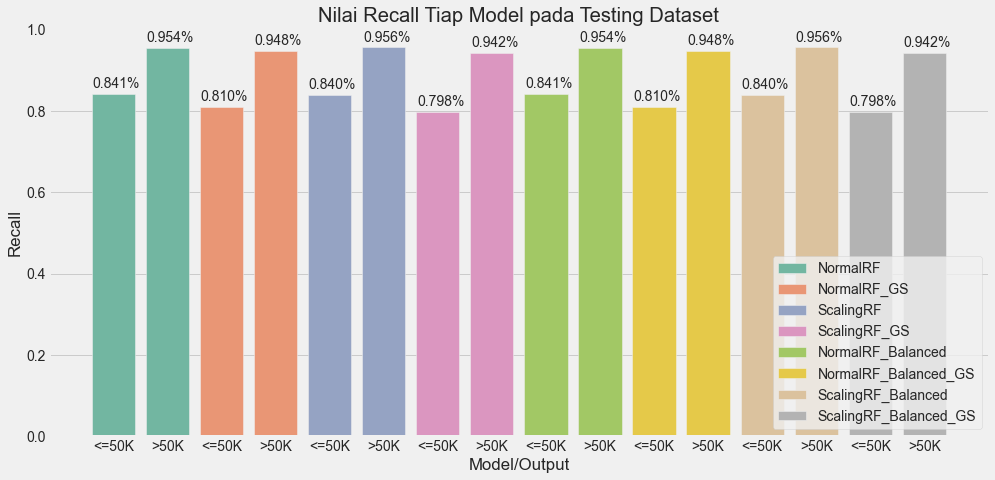

In [554]:
# Melakukan viwualisasi untuk melihat perbandingan nilai Recall pada tiap model yang 
# menggunakan testing dataset


plt.figure(figsize = (15, 7))

ax = sns.barplot(data = test_precision_recal_f1score,
                 x = "Model/Output", y = "Recall", hue = "Model", palette= "Set2", dodge = False)

for p in ax.patches:
    ax.annotate("{:.3f}%".format((p.get_height())),
                (p.get_x() + 0.015, p.get_height() + 0.015))

plt.title("Nilai Recall Tiap Model pada Testing Dataset")
plt.xticks(ticks= test_precision_recal_f1score.index  ,
           labels = test_precision_recal_f1score.Output)
plt.legend(loc = "lower right")
plt.savefig("Nilai Recall Tiap Model pada Testing Dataset.png")
plt.plot()

[]

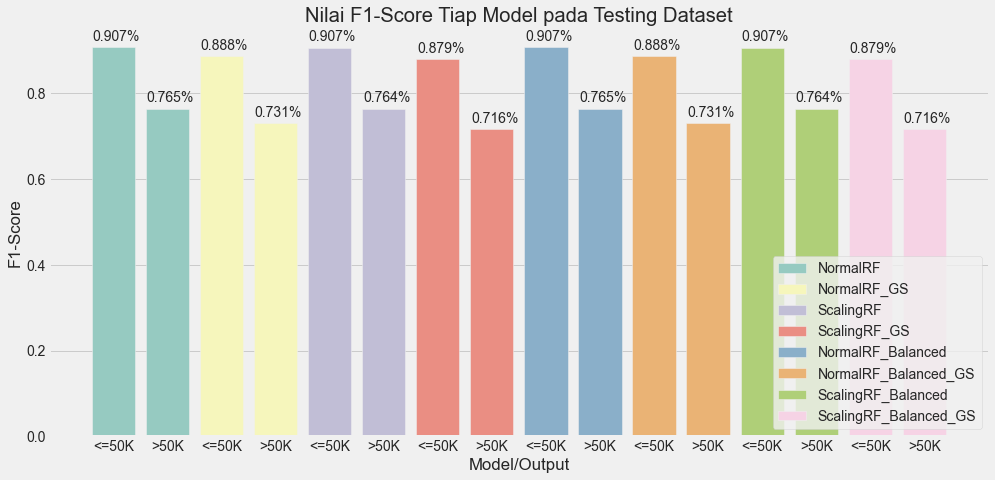

In [555]:
# Melakukan viwualisasi untuk melihat perbandingan nilai F1-Score pada tiap model yang 
# menggunakan testing dataset


plt.figure(figsize = (15, 7))

ax = sns.barplot(data = test_precision_recal_f1score,
                 x = "Model/Output", y = "F1-Score", hue = "Model", palette= "Set3", dodge = False)

for p in ax.patches:
    ax.annotate("{:.3f}%".format((p.get_height())),
                (p.get_x() + 0.015, p.get_height() + 0.015))

plt.title("Nilai F1-Score Tiap Model pada Testing Dataset")
plt.xticks(ticks= test_precision_recal_f1score.index  ,
           labels = test_precision_recal_f1score.Output)
plt.savefig("Nilai F1-Score Tiap Model pada Testing Dataset.png")
plt.legend(loc = "lower right")
plt.plot()